#Library

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 8.2 MB/s eta 0:00:00


In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict

#Hypotesis Testing
from scipy.stats import kstest, mannwhitneyu, chi2_contingency

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, MinMaxScaler, StandardScaler, PolynomialFeatures, KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, f_classif, SelectFwe
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

from category_encoders import BinaryEncoder

# Balancing
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTEN, ADASYN, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from imblearn.combine import SMOTEENN, SMOTETomek

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Ensemble
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm.sklearn import LGBMClassifier

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, StratifiedKFold

# Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imb_pipeline

# Metric
from sklearn.metrics import classification_report, make_scorer, f1_score, recall_score, precision_score, roc_auc_score, fbeta_score, RocCurveDisplay, accuracy_score
from imblearn.metrics import classification_report_imbalanced

# Visualisai
import seaborn as sns
import matplotlib.pyplot as plt

#Explainable Model
import shap

import warnings
warnings.filterwarnings("ignore")

# 1. Business Understanding

## 1.1 Business Background

TLC.co is a subsidiary of the Cayo group which was only formed in 2020. TLC.Co is telecommunication company that provide internet services and cyber security and tech support. The products offered by this company are Internet Service, Online Security, Online Backup, Device Protection, and Tech Support.  

Customers who want to use products from TLC.Co can subscribe to these products by paying fees according to the product monthly, annually or 2 years. Customers who want to use products from TLC.Co can subscribe to these products by paying fees according to the product monthly, annually, or 2 years. and this is the main source of revenue for TLC.Co.

Even though TLC.co is a young company, within 4 years the company's development has been rapid with the release of new products such as cyber security and device protection.  

However, in 2023 there are a significant decline in company income. This indicates many customers is **churn** have **cancel or did not renew the subscription** to TLC.Co products. Therefore, **how to overcome a significant decline in company income so that TLC.Co's income remains consistent or increases?**.


## 1.2 Business Model

TLC.Co is **Subscription-based** company. This Business models strive to attract clients in the hopes of luring them into long-time, loyal patrons. This is done by offering a product that requires ongoing payment, usually in return for a fixed duration of benefit.

**Advantage of Subscription-based business model :**  
- Predictable and Better Revenue Stream  
Once the company have been operating long enough to collect data, the number of customers you gain and lose in a given time frame will be more predictable, making it easier to judge what your income will look like from one month to the next.

**Disadvatage of Subscription-based business model :**
- Too reliant on customers to renew the subscription  
Because subscription businesses often rely on making their money in the long-term as opposed to in one lump sum, they require customers to stick around for a while.  
Businesses that aren't careful about **controlling churn** can find themselves spending more on CAC than they are getting back from existing customers that mean  decline in company's revenue.



[Link](https://www.paddle.com/resources/subscription-business-model)

## 1.3 Business Metric

### 1.3.1 Churn Rate




- Churn rate is the percentage of customers who cancel or don't renew their subscriptions or contracts for a company's services or products.

- The lower the churn rate value, the better the company's performance. (Because rising churn rates mean many customer that leave the company and it could indicate a problem with a company's offerings or customer service approach, or it could mean the company is losing business to competitors).

- Hot to calculate churn rate:  
<center>
Churn rate = Number of customers lost during period / Starting number of customers at beginning of period x 100

- So churn rate is an important business metric for Telco Company that provide internet service, online security and backup, device protection and tech support by subcription to its customer.   

- The ideal churn rate for mature and established companies is 5% to 7% in annual churn and less than 1% in monthly churn.

[Link](https://www.forbes.com/advisor/business/churn-rate/#:~:text=The%20ideal%20churn%20rate%20for,to%20five%20customers%20per%20month)

### 1.3.2 Customer Lifetime Value (CLV)



- CLV is the profit earned from a customer over the entire time they remain a customer.
- But when calculate the CLV its better to the average of all customers, or of like customer groups. so we can compare it with customer acquisition cost (CAC).
- When CAC is higher than CLV it is better to focus maintain the current customer and lower the curn rate. but if CAC is lower then CLV we can more focus to obtain new customer and minimize the churn rate effect.
-How to calculate CLV:
<center>
Customer lifetime value = (Average transaction value x Average number of transactions in a year x Average customer retention in years) x Profit margin

- So for telco company knowing the CLV and better knowing the comparison between CLV and CAC make it easier to decide wether to maintain its current customer or focus to gain new customer.

[Link](https://www.netsuite.com/portal/resource/articles/business-strategy/business-metrics.shtml)

### 1.3.3 Customer Retention


- Customer retention is the percentage of existing customers that stay during a specific period of time.
- The higer the customer retention value, the better the company's performance.
- How to calculate customer churn rate:
<center>
Customer retention = (Number of customers at end of a period - Customers added during period) / Number of customers at beginning of period

- Customer retention is one of important metric for telco company and it is related to metric churn rate. Because churn rate is percentage of customer that leave the company in certain period and customer retention is old customer that remain in company in certain period.

- the average customer retention rate across industries is 70% to 80%.

[Link](https://userpilot.com/blog/average-customer-retention-rate/)

### 1.3.4 Churn Rate vs Customer Retention

- So when both churn rate and customer retention is high it indicate that many of the people leaving are new customers, and company can focus to maintain the new customer.

- But when both churn rate and customer retention is low it indicate that many of the people leaving are old customers, and company can focus to maintain the old customer.

- When churn rate is low and customer retention is high it indicate that the company is in good position. because few customer leave in that period and many old customer stay in that period

- But when churn rate is high and customer retention is low it indicate that the company is in bad position. because many customer leave in that period and few old customer stay in that period

### 1.3.5 Customer Retention Cost

- Customer retention cost is the sum of expenses involved in maintaining current customers, which includes loyalty programs, customer service, and personalized marketing.
-  It aids in evaluating the effectiveness of strategies for retaining customers and validating the allocation of resources.
-- How to calculate customer retention cost:
<center>
Customer retention cost = Total Revenue - (Total Revenue * Customer Retention Rate)  
<center>
CRC per customer = customer retention cost / total active customer

source : https://www.process.st/how-to/calculate-the-cost-of-customer-retention/

## 1.4 Business Problem Understanding

### 1.4.1 Problem

In 2023, TLC.Co revenue is declining due to high churn rate. So to **minimize the curn rate** we need to **identification** which customer that high likely to churn and manage that customer to keep subscribing. Customers are said to **churn** if **customers stop subscribing or cancel their subscription**. So companies want to know which customers will churn so that the company can provide treatment and offers to these customers so they don't churn. In this way, the revenue obtained by the company remains stable and increases.

Target : Churn  
0 = customers don't churn  
1 = customer churn


### 1.4.2 Problem Statement

To provide offers so that customers do not churn. Providing the same offer to all customers is ineffective and consumes resources, especially if you don't identify which customers will churn because offers that do not suit the customer's conditions will not be accepted by the customer and will be in vain. For example, if a customer about to churn is given a long-term offer, it is unlikely that the customer will accept the offer and still churn.

So companies want to increase the efficiency of providing offers to customers by knowing which customers are most likely to churn so they can be given offers that keep them from canceling subscriptions.

### 1.4.3 Goal

- So based on these problems, the company wants to have the ability to predict the possibility that a customer will cancel/unsubscribe or not, so that the company can provide the correct treatment and offers to customers who will stop subscribing.

- Also, companies want to know what factors make a customer churn or not, so they can plan better in approaching customer churn (customers who are about to churn or cancel their subscription).

### 1.4.4 Analytic Aproach

- We will first analyze the data to identify patterns that differentiate unsubscribing customers from those who remain subscribed. Then, we will build a classification model to predict the probability of customer churn (unsubscription).

- We will then build a classification model to predict the probability of a customer unsubscribing within a specific timeframe (e.g., next month, next quarter)

### 1.4.5 Evaluation Metric

To assess a classification model's ability to predict different classes, we can use a confusion matrix, as shown in the example below.

|  | Actual Positive | Actual Negative |
|---|---|---|
| Predicted Positive | True Positve | False Positve |
| Predicted Negative | False Negative | True Negative |

This is a table that summarizes the model's performance by showing the number of correct and incorrect predictions for each class. From that table there is 2 type error:
- Type 1 error = False Positives (FP):  
When the model incorrectly predicts a positive class (mistakes a negative for a positive). This misclassification can lead to retaining customers the model identifies as churned, resulting in wasted resources on a futile bidding strategy.
- Type 2 error = False Negatives (FN):  
When the model incorrectly predicts a negative class (mistakes a positive for a negative). This misclassification can cause us to miss churn altogether. Customers who actually leave go unnoticed, leading to lost revenue and a potential decrease in customer lifetime value.

While ideal models minimize errors, reducing one type of error often comes at the expense of increasing another. This necessitates a careful balancing act when evaluating and refining a model.

Our goal is to develop a model that minimizes customer churn while avoiding wasted resources on customers unlikely to churn. This necessitates prioritizing the identification of true churners (**high recall**) by minimizing false negative (identifying churners as non-churners). Since missing churners is particularly critical, the **recall-score** becomes a key evaluation metric.






# 2. Data Exploration

- Data Source :  https://drive.google.com/drive/folders/1_fR7R0srpZgnFnanbrmELgnK-xmzMAHp

In [ ]:
#Import Data from csv and showcase the first 5 data
df = pd.read_csv('data_telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


## 2.1 Data Understanding

This dataset focuses on customer profiles who have churned, meaning they discontinued their service with the telecom company. In the context of subscription services like TLC.Co, churn refers to customers leaving their provider.  

This dataset contains information on 4,930 customers who use telecommunication services. It includes 10 features describing each customer, along with a target variable indicating whether a customer churned or not.\
<br>
<center>Target</center>  

<center>

| No. | Feautre Name | Description |
|-|-|-|
| 1. | **Churn** | Whether the customer churns or not.|

<center><br>

<center>Feature</center>
<center>

| No. | Feautre Name | Description |
|-|-|-|
| 1. | **Dependents** | Whether the customer has dependents or not.|
| 2. | **Tenure** | Number of months the customer has stayed with the company.|
| 3. | **OnlineSecurity** | Whether the customer has online security or not. |
| 4. | **OnlineBackup** | Whether the customer has online backup or not. |
| 5. | **InternetService** | Whether the client is subscribed to Internet service |
| 6. | **DeviceProtection** | Whether the client has device protection or not.|
| 7. | **TechSupport** |  Whether the client has tech support or not |
| 8. | **Contract** |Type of contract according to duration. |
| 9. | **PaperlessBilling** | Bills issued in paperless form. |
| 10. | **MonthlyCharges** | Amount of charge for service on monthly bases |
<center>

### 2.1.1 Business Metric TLC.Co

- Telco Company's Churn Rate

In [ ]:
#Calculate the churn rate of TLC.Co using churn rate formula above
cr = (df.loc[df['Churn']=='Yes','Churn'].count())*100/(df.loc[df['tenure']>=12,'tenure'].count())
print(f"The churn rate of Telco Company is {cr.round(2)}%")

The churn rate of Telco Company is 37.84%


TLC.Co's customer churn rate falls outside the ideal range (5-7% annually). This indicates room for improvement in strategies for maintaining current customers.

- Telco Company's Customer Lifetime Value (CLV)

In [ ]:
#Calculate the CLTV of TLC.Co using CLTV formula above
df['CLV'] =( df['MonthlyCharges'])*(df['tenure'])*0.125
print(f"Customer Lifestame Value of Telco Company is ${df['CLV'].mean().round(2)}")
df = df.drop(columns='CLV')

Customer Lifestame Value of Telco Company is $284.8


TLC.Co's customer lifetime value (CLTV) of \$284.80 falls below the average Customer Acquisition Cost (CAC) for the IT and Managed Services industry (\$454.00). This negative gap of $169.20 emphasizes the importance of customer retention strategies. Retaining existing customers becomes crucial to achieve profitability, as acquiring new ones is currently more expensive than the value they bring in their lifetime.  

Based on:
https://userpilot.com/blog/average-customer-acquisition-cost/

- Customer Retention

In [ ]:
#Calculate the Customer Retention of TLC.Co using Customer Retention rate formula above
retention = ((df.loc[df['Churn']=='No','Churn'].count())-(df.loc[(df['Churn']=='No')&(df['tenure']<12),'Churn'].count()))*100/(df.loc[(df['tenure']>=12),'Churn'].count())
print(f"Customer Retention of Telco Company is {retention.round(2)}%")

Customer Retention of Telco Company is 82.69%


The TLC.Co boasts a strong customer retention rate of 82.69%, exceeding the industry average which typically falls between 70% and 80%. This translates to a significant portion of their customer base remaining loyal subscribers.

- Customer Retention Cost

In [ ]:
#Calculate the Customer Retention Cost of TLC.Co using CRC and CRC per customer formula above
revenue_oldc= df.loc[df['tenure']>=12,'MonthlyCharges'].apply(lambda x: x*12)
revenue_newc= df.loc[df['tenure']<12,['MonthlyCharges','tenure']].apply(lambda x: x*df['tenure'])
total_revenue = revenue_oldc.sum() + revenue_newc['MonthlyCharges'].sum()

CRC = total_revenue - (total_revenue*retention/100)
CRC_per_customer = CRC/len(df)

print(f'CRC per customer for TLC.Co is ${CRC_per_customer.round(2)}')

CRC per customer for TLC.Co is $113.18


Retaining customers is significantly more cost-effective for TLC.co than acquiring new ones.  TLC.co invests \$113 to prevent customer churn, and its lower compared to the industry average of \$454 to acquire a new customer (Customer Acquisition Cost for IT and Managed Services).

This reinforces the importance of prioritizing customer retention strategies for TLC.co. By focusing on keeping existing customers happy, TLC.co can save money and achieve sustainable growth.

- Churn Rate vs Customer Retention

TLC.Co.'s situation presents an interesting paradox. While their customer retention rate (82.69%) is impressive, exceeding the industry average, their churn rate might still be high. This could indicate a challenge with acquiring and retaining new customers. TLC.Co. should investigate the reasons behind customer churn among new subscribers to develop targeted strategies for onboarding and early engagement.

Despite a strong customer retention rate (82.69%), TLC.Co. can still benefit from further reducing churn, especially if customer acquisition costs (CAC) are high. Analyzing the reasons behind customer churn can help develop targeted retention strategies. Focusing on improving the customer experience, particularly for new subscribers, can be a valuable approach.

## 2.2 Data Cleaning

Data cleaning is a crucial step prior to model building. It ensures the data is high-quality and free of errors, inconsistencies, duplicates, or missing values. Clean data allows machine learning models to learn effectively from the information and generate more accurate and reliable results.

### 2.3.1 Check Data

Check data performs general checks on data such as checking the consistency of input data values, checking data types, etc.

In [ ]:
#Describe general information of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


- From the 10 features, 8 of them are categorical variables and the other 2 are numerical variables.
- All feturea have 3944 data, that indicate there is no missing value.

In [ ]:
#Describe unique value for each feature and cardinality for categorical feature
columns = df.columns
na_values = [df[col].isnull().sum() for col in columns]
n_unique_values = [df[col].nunique() for col in columns]
unique_values = [df[col].sort_values().unique() for col in columns]

pd.DataFrame({
    'Features': columns,
    'NA Values': na_values,
    'Total Unique': n_unique_values,
    'Unique Values': unique_values
})

,Features,NA Values,Total Unique,Unique Values
0,Dependents,0,2,"[No, Yes]"
1,tenure,0,73,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,OnlineSecurity,0,3,"[No, No internet service, Yes]"
3,OnlineBackup,0,3,"[No, No internet service, Yes]"
4,InternetService,0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,0,3,"[No, No internet service, Yes]"
6,TechSupport,0,3,"[No, No internet service, Yes]"
7,Contract,0,3,"[Month-to-month, One year, Two year]"
8,PaperlessBilling,0,2,"[No, Yes]"
9,MonthlyCharges,0,1422,"[18.8, 18.85, 18.9, 18.95, 19.0, 19.05, 19.1, ..."


- There is inconsistency in the data values for the features `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, and `TechSupport`, so there is need to change the value for that feature.
- There is no missing values in all feature

- [ ] handle inputation errors and inconsistencies

In [ ]:
#Change value 'No internet service' to 'No' in Online Security feature
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No internet service':'No'})
df['OnlineSecurity'].value_counts()

OnlineSecurity
No     3497
Yes    1433
Name: count, dtype: int64

In [ ]:
#Change value 'No internet service' to 'No' in Online Backup feature
df['OnlineBackup'] = df['OnlineBackup'].replace({'No internet service':'No'})
df['OnlineBackup'].value_counts()

OnlineBackup
No     3224
Yes    1706
Name: count, dtype: int64

In [ ]:
#Change value 'No internet service' to 'No' in Device Protection feature
df['DeviceProtection'] = df['DeviceProtection'].replace({'No internet service':'No'})
df['DeviceProtection'].value_counts()

DeviceProtection
No     3238
Yes    1692
Name: count, dtype: int64

In [ ]:
#Change value 'No internet service' to 'No' in Tech Support feature
df['TechSupport'] = df['TechSupport'].replace({'No internet service':'No'})
df['TechSupport'].value_counts()

TechSupport
No     3519
Yes    1411
Name: count, dtype: int64

- Check Target Variable

In [ ]:
#Check distribution of classes
df['Churn'].value_counts()

Churn
No     3614
Yes    1316
Name: count, dtype: int64

- No missing value in target.
- The target is still categorical so encoding needs to be done.

In [ ]:
#Check distribution of classes (percentage)
df['Churn'].value_counts(normalize=True)

Churn
No     0.733063
Yes    0.266937
Name: proportion, dtype: float64

- Target variabel that is positive is 27% of the data it mean that the data is imbalanced.

- [ ] Encoding Target value

In [ ]:
#Encoding Target Value {"Yes":1, "No":0}
df['Churn'] = df['Churn'].apply(lambda x:1 if x=='Yes' else 0)
df['Churn'].value_counts(normalize=True)

Churn
0    0.733063
1    0.266937
Name: proportion, dtype: float64

### 2.3.2 Check Missing Value

From checking above, we know that there is no missing value in both feature and target. But to make sure we must check again, because in machine learning cannot process missing value.

In [ ]:
#Check missing value in all variable (Target and Feature)
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Inspection of the data reveals no missing values in any features or the target variable, enabling us to proceed with next check.

### 2.3.2 Check Duplicated Data

Machine learning models generally don't prefer duplicate data for a few reasons like Biases the Model, Reduces Training Efficiency, Doesn't Reflect Real-World Distribution, etc.

In [ ]:
#Check the number of duplicate rows
df.duplicated().sum()

77

In [ ]:
#Check the duplicate rows
df.loc[df.duplicated(keep=False)].sort_values(by='MonthlyCharges')

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
675,No,4,No,No,No,No,No,Month-to-month,No,19.00,0
4499,No,4,No,No,No,No,No,Month-to-month,No,19.00,0
334,No,1,No,No,No,No,No,Month-to-month,No,19.20,0
3565,No,1,No,No,No,No,No,Month-to-month,No,19.20,0
2612,No,72,No,No,No,No,No,Two year,No,19.30,0
...,...,...,...,...,...,...,...,...,...,...,...
3940,No,2,No,No,Fiber optic,No,No,Month-to-month,Yes,93.85,1
946,No,72,No,Yes,Fiber optic,Yes,Yes,Two year,Yes,109.75,0
2075,No,72,No,Yes,Fiber optic,Yes,Yes,Two year,Yes,109.75,0
1466,No,72,Yes,Yes,Fiber optic,Yes,Yes,Two year,No,115.15,0


In [ ]:
#Drop the duplicate rows
df = df.drop_duplicates()

Data duplication has been successfully eliminated, ensuring a clean dataset free from redundant entries. We can now proceed with the next check.

### 2.3.3 Check Data Outlier

Outliers, data points that fall far outside the typical range of a dataset, can have several negative effects on machine learning models like Biasing the Model, Overfitting, Reduced Model Robustness.

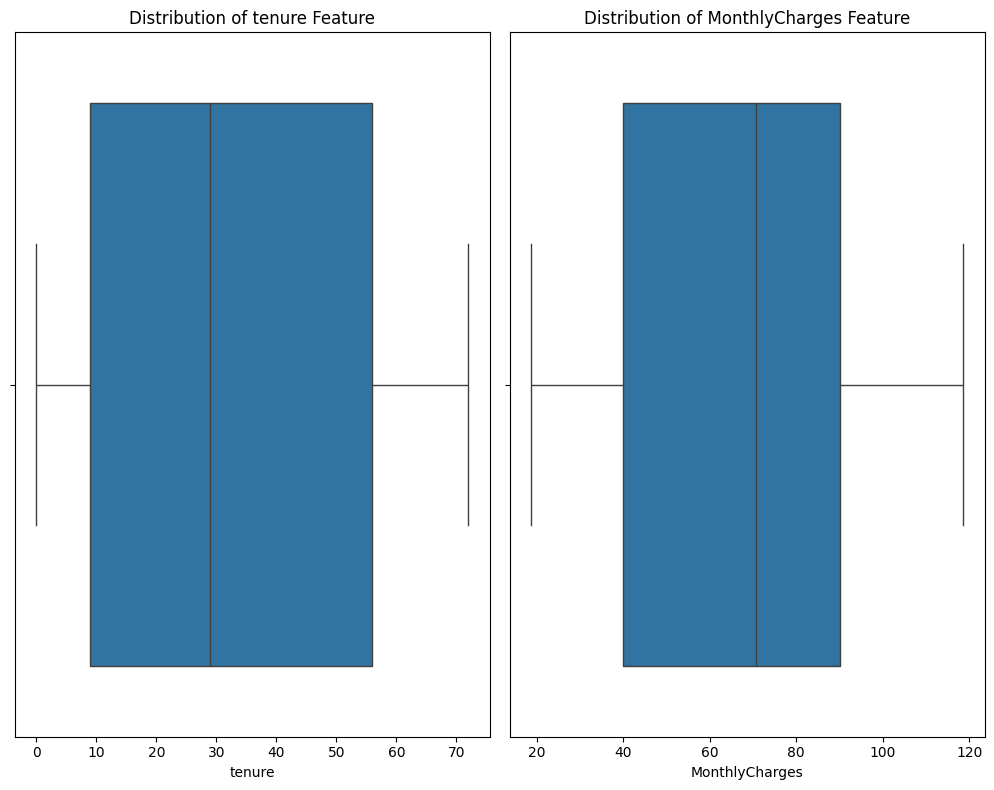

In [ ]:
#Check Otlier in numerical feature usign boxplot
plt.figure(figsize=(15,8))
for idx,col in enumerate(df.drop(columns='Churn').select_dtypes('number').columns):
  boxplot = sns.boxplot(df,x=col,ax=plt.subplot(1,3,idx+1))
  boxplot.set_title(f"Distribution of {col} Feature")

plt.tight_layout()
plt.show()

There is no data outlier in both Tenure and MonthlyCharge Feature.

Following successful data cleaning, we now have a clean dataset ready for the next steps. We can proceed with splitting the data for training and testing, followed by in-depth exploration of features and targets.

## 2.3 Data Spliting

Since we lack external data for testing, we'll employ a train-test split on the existing dataset. This involves dividing the processed data (already separated into features and target variables) into two subsets: a training set used to build the model and a testing set used to evaluate its performance on unseen data.

In [ ]:
#Set Feature and Target
feature = df.drop(columns='Churn')
target = df['Churn']

In [ ]:
#Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(feature, #Data Feature
                                                    target, #Data Target
                                                    test_size=0.2, #Number of samples in test_size
                                                    stratify=target, #keep the distribution of classes the same
                                                    random_state=48)

In [ ]:
#Check the results of the training data
print('Training feature data dimensions :', X_train.shape)
print('Training target data dimensions :', y_train.shape)

Training feature data dimensions : (3882, 10)
Training target data dimensions : (3882,)


In [ ]:
#Check the results of the testing data
print('Testing feature data dimensions :', X_test.shape)
print('Testing target data dimensions :', y_test.shape)

Testing feature data dimensions : (971, 10)
Testing target data dimensions : (971,)


- Consistent number of row and columns (number of features) across training and testing data indicates a successful split procedure

In [ ]:
# Distribution of class for Target_train
y_train.value_counts(normalize='True')

Churn
0    0.734673
1    0.265327
Name: proportion, dtype: float64

In [ ]:
# Distribution of class for Target_test
y_test.value_counts(normalize='True')

Churn
0    0.734295
1    0.265705
Name: proportion, dtype: float64

- Consistent distribution of class for target across training and testing data indicates a successful split procedure

## 2.4 Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial initial step in the machine learning workflow. It involves analyzing and visualizing your data to gain insights, understand its characteristics, and prepare it for modeling.
- Identifying patterns
- Feature exploration
- Identifying data quality issues

In [ ]:
#Combine X_train and y_train for easy data exploration
df_train = X_train.join(y_train)
df_train.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
2610,No,50,No,No,No,No,No,Two year,No,19.40,0
285,Yes,45,No,No,No,No,No,Two year,No,19.20,0
2408,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.90,1
2031,No,3,No,Yes,Fiber optic,Yes,Yes,Month-to-month,Yes,107.95,0
2427,No,41,No,Yes,Fiber optic,No,No,Month-to-month,Yes,89.20,0


### 2.4.1 Target Variable EDA

Examine the distribution of classes within the target variable to determine if the data is imbalanced.

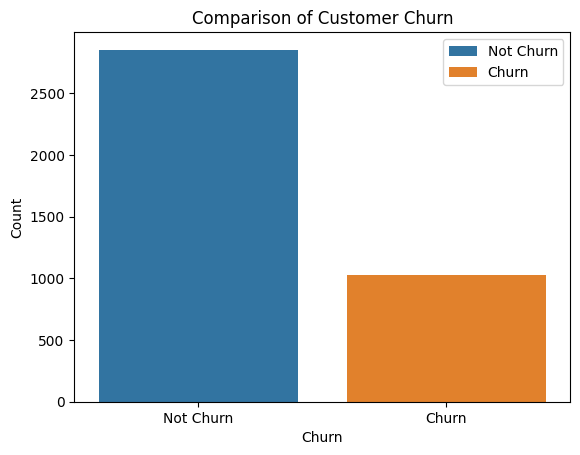

In [ ]:
#Check Distribution of class for Target variable
churn = y_train.to_frame().groupby('Churn')['Churn'].count().reset_index(name='Count')
ax = sns.barplot(churn,x='Churn',y='Count',hue='Churn')

plt.xticks(ticks = [0,1], labels=['Not Churn', 'Churn'])
plt.title('Comparison of Customer Churn')

hands, labs = ax.get_legend_handles_labels()
plt.legend(handles=hands, labels=['Not Churn', 'Churn'])
plt.show()

- The number of customer that Churn and customer that stay is significantly different, so we can say that the data is imbalanced

- when set up Machine learning we need to solving this by resampling the data before fit to model.

### 2.4.2 Feature : Numeric Variable EDA

We will explore the relationships between numeric features and the target variable ('churn') to uncover underlying patterns in customer churn behavior. These insights can serve as a foundation for further analysis.

**Tenure Variable**

Explore the `tenure` distribution to assess if median tenure significantly different between churned and retained customers.

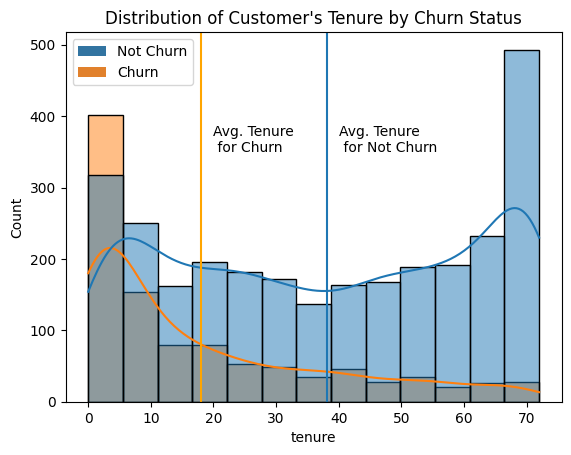

In [ ]:
#Plotting distribution of Tenure
sns.histplot(x = X_train['tenure'],hue=y_train,kde=True)
plt.title('Distribution of Customer\'s Tenure by Churn Status')

plt.axvline(x=df_train.loc[df_train['Churn']==0,'tenure'].mean())
plt.text(x=20,y=350,s="Avg. Tenure \n for Churn")
plt.axvline(x=df_train.loc[df_train['Churn']==1,'tenure'].mean(),color='orange')
plt.text(x=40,y=350,s="Avg. Tenure \n for Not Churn")

hands, labs = ax.get_legend_handles_labels()
plt.legend(handles=hands, labels=['Not Churn', 'Churn'])
plt.show()

The tenure histogram reveals a clear pattern: customers who churn tend to have lower tenure values, while those who remain have a higher concentration of longer tenure.

In [ ]:
#Check Tenure data distribution using Kolmogorov-Smirnov Test
stat, pvalue = kstest('norm', X_train['tenure'])
H0 = "Data is normally distributed"
Ha = "Data is not normally distributed"
if pvalue < 0.05:
    print(f"H0 is rejected, then we have enough evidence to state that {Ha}")
else:
    print(f"H0 is accepted, so {H0}")

H0 is rejected, then we have enough evidence to state that Data is not normally distributed


Given the non-normal distribution of `tenure` data, consider non-parametric tests that utilize the median as the central tendency measure for analysis.

In [ ]:
#Check median tenure of churned and retained customers.
tenure = X_train.groupby(y_train)['tenure'].median().reset_index()
tenure

,Churn,tenure
0,0,39.0
1,1,10.0


In [ ]:
#Check differences median tenure between churned and retained customers using MannWhitney Test.
stats, pvalue = mannwhitneyu(df_train.loc[df_train['Churn']==1,'tenure'], df_train.loc[df_train['Churn']==0,'tenure'],alternative='Less')
H0 = "The Median Tenure of customers who churn is greater than or equal to the Median Tenure of customers who stay."
Ha = "The Median Tenure of customers who churn is smaller than the Median Tenure of customers who stay."
alpha = 0.05

if pvalue <= alpha:
    print(f"Because the P-value ({round(pvalue, 3)}) < {alpha} then H0 is rejected, then we have enough evidence to state that {Ha}")
else:
    print(f"Because the P-value ({round(pvalue, 3)}) > {alpha} then H0 is accepted, so {H0}")

Because the P-value (0.0) < 0.05 then H0 is rejected, then we have enough evidence to state that The Median Tenure of customers who churn is smaller than the Median Tenure of customers who stay.


We found a clear distinction in tenure: churned customers have a lower median tenure compared to retained customers. This suggests that shorter tenures might be associated with a higher propensity to churn.

**MonthlyCharges Variable**

Explore the `MonthlyCharges` distribution to assess if Monthly Charges significantly different between churned and retained customers.

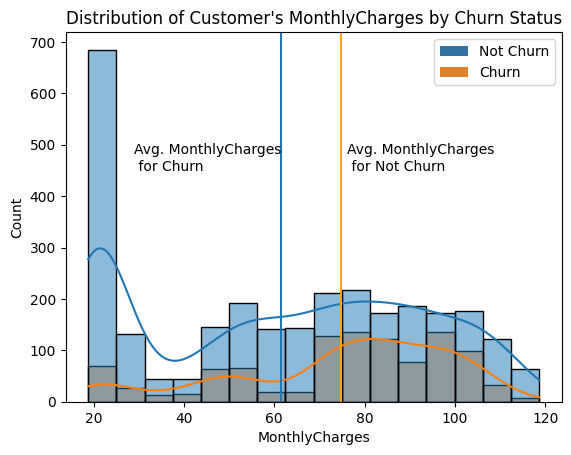

In [ ]:
#Plotting distribution of MonthlyCharges
sns.histplot(x = X_train['MonthlyCharges'],hue=y_train,kde=True)
plt.title('Distribution of Customer\'s MonthlyCharges by Churn Status')

plt.axvline(x=df_train.loc[df_train['Churn']==0,'MonthlyCharges'].mean())
plt.text(x=29,y=450,s="Avg. MonthlyCharges \n for Churn")
plt.axvline(x=df_train.loc[df_train['Churn']==1,'MonthlyCharges'].mean(),color='orange')
plt.text(x=76,y=450,s="Avg. MonthlyCharges \n for Not Churn")

hands, labs = ax.get_legend_handles_labels()
plt.legend(handles=hands, labels=['Not Churn', 'Churn'])
plt.show()

The monthly charge histogram reveals an interesting trend: customers who churn are more likely to have higher monthly charges compared to those who remain. This suggests investigating price as a potential driver of churn.

In [ ]:
#Check MonthlyCharges distribution
stat, pvalue = kstest('norm', X_train['MonthlyCharges'])
H0 = "Data is normally distributed"
Ha = "Data is not normally distributed"
if pvalue < 0.05:
    print(f"H0 is rejected, then we have enough evidence to state that {Ha}")
else:
    print(f"H0 is accepted, so {H0}")

H0 is rejected, then we have enough evidence to state that Data is not normally distributed


Given the non-normal distribution of `MonthlyCharges` data, consider non-parametric tests that utilize the median as the central tendency measure for analysis.

In [ ]:
#Check median MonthlyCharges of churned and retained customers.
MonthlyCharges = X_train.groupby(y_train)['MonthlyCharges'].median().reset_index()
MonthlyCharges

,Churn,MonthlyCharges
0,0,64.450
1,1,79.975


In [ ]:
#Check MonthlyCharges data distribution using Kolmogorov-Smirnov Test
stats, pvalue = mannwhitneyu(df_train.loc[df_train['Churn']==1,'MonthlyCharges'], df_train.loc[df_train['Churn']==0,'MonthlyCharges'],alternative='Greater')
H0 = "The Median MonthlyCharges of customers who churn is greater than or equal to the Median MonthlyCharges of customers who stay."
Ha = "The Median MonthlyCharges of customers who churn is smaller than the Median MonthlyCharges of customers who stay."
alpha = 0.05

if pvalue <= alpha:
    print(f"Because the P-value ({round(pvalue, 3)}) < {alpha} then H0 is rejected, then we have enough evidence to state that {Ha}")
else:
    print(f"Because the P-value ({round(pvalue, 3)}) > {alpha} then H0 is accepted, so {H0}")

Because the P-value (0.0) < 0.05 then H0 is rejected, then we have enough evidence to state that The Median MonthlyCharges of customers who churn is smaller than the Median MonthlyCharges of customers who stay.


We found a clear distinction in Monthly Charges: churned customers have a higher median Monthly Charges compared to retained customers. This suggests that costly Monthly Charges might be associated with a higher propensity to churn.

### 2.4.3 Feature : Categoric Variable EDA

We will explore the relationships between categoric features and the target variable ('churn') to uncover underlying patterns in customer churn behavior. These insights can serve as a foundation for further analysis.

In [ ]:
#Function for creating pivot table, stacked barplot, and chi square test
def create_stacked_chi2(df,column,idx,value,agg):
  #Create pivot table
  pvt = pd.pivot_table(data = df,columns = column,index=idx,values=value,aggfunc=agg)

  #Create stacked barplot
  ax = pvt.plot(kind='bar',stacked=True,color=['green','red'],figsize=(8,6))
  plt.title(f'The Number of Customer by Features {idx} based on {column}')
  plt.xlabel(idx)
  plt.ylabel('Number of Customer')
  total=[]
  #Add value annotation in plot
  for id,c in enumerate(ax.containers):
    # print(c)
    sum=0
    for i in range(len(ax.containers)):
      # print(c[i])
      sum += ax.containers[i][id].get_height()
    total.append(sum)
  for id,c in enumerate(ax.containers):
      labels = [str((c[v].get_height()*100/total[v]).round(2))+'%' if c[v].get_height() > 0 else '' for v in range(len(ax.containers))]
      ax.bar_label(c, labels=labels,color = "white", label_type='center')
      ax.bar_label(ax.containers[-1])
  hands, labs = ax.get_legend_handles_labels()
  plt.legend(handles=hands, labels=['Not Churn', 'Churn'])

  #Chi-Square Test
  stat, pvalue, dof, expected_val = chi2_contingency(pvt)
  H0 = f"Feature {idx} and Target Churn is independent (have the same proportion)"
  Ha = f"Feature {idx} and Target Churn is dependent (have significant differences in proportion)"
  if pvalue < 0.05:
    y = f"H0 is rejected, so we have enough evident that {Ha}"
  else:
    y = f"H0 is accapeted, so {H0}"
  chi2_test = [H0, Ha, pvalue, y]
  return ax, chi2_test, pvt

- **Feature Dependents**

Compare the distribution of the `dependent` variable across the `churn` classes to assess if customers with dependents are more likely to churn than those without.

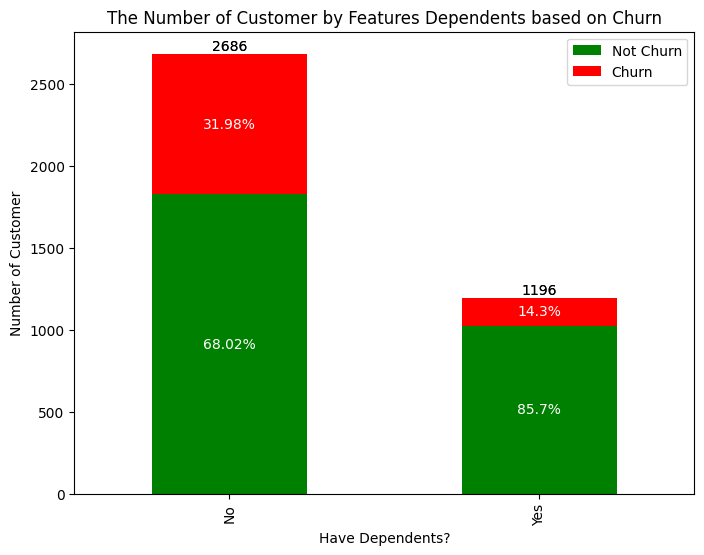

In [ ]:
#Stacked Barplot for Dependents Variable
bar_dependents, chi2_test_dependents, pvt_dependents = create_stacked_chi2(df_train,
                                                                           'Churn',
                                                                           'Dependents',
                                                                           'tenure',
                                                                           'count')
bar_dependents.set_xlabel('Have Dependents?')
# plt.savefig('compare dependents.png', transparent=True)
plt.show()

**Churn rate is lower for customers with dependents**  
Churn rate is higher for customers with no dependents: The graph shows that a higher percentage of customers with no dependents churned (31.98%) compared to those with (14.3%). This suggests that having no dependents might be a risk factor for churn.

In [ ]:
# Chi Square Test for Dependents vs Churn
print('The Chi-Square test assesses the independence between the "dependent" feature and the "churn" target variable.')
print('')
print('hypothesis:')
print('H0 :',chi2_test_dependents[0])
print('Ha :',chi2_test_dependents[1])
print('')
print('Pvalue =',chi2_test_dependents[2])
print('')
chi2_test_dependents[3]

The Chi-Square test assesses the independence between the "dependent" feature and the "churn" target variable.

hypothesis:
H0 : Feature Dependents and Target Churn is independent (have the same proportion)
Ha : Feature Dependents and Target Churn is dependent (have significant differences in proportion)

Pvalue = 1.622568902359516e-30



'H0 is rejected, so we have enough evident that Feature Dependents and Target Churn is dependent (have significant differences in proportion)'

- **Feature OnlineSecurity**

Compare the distribution of the `OnlineSecurity` variable across the `churn` classes to assess if customers who haven't enabled online security may be more likely to churn than those who have.

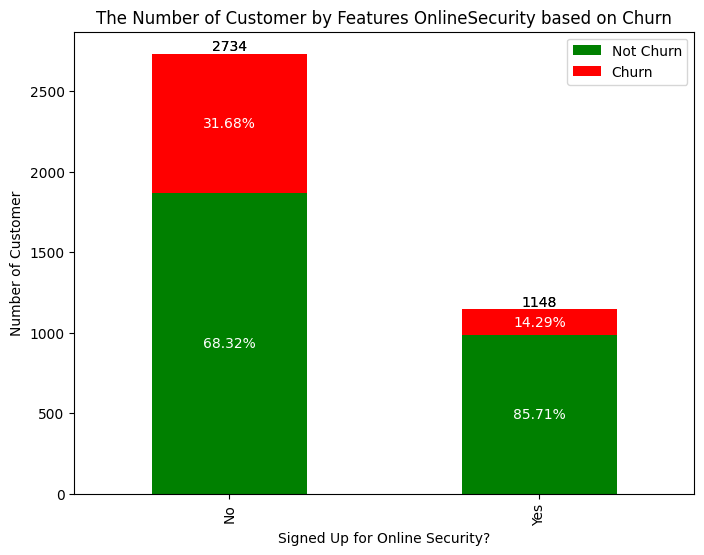

In [ ]:
#Stacked Barplot for OnlineScurity Variable
bar_OnlineSecurity, chi2_test_OnlineSecurity, pvt_OnlineSecurity = create_stacked_chi2(df_train,
                                                                                       'Churn',
                                                                                       'OnlineSecurity',
                                                                                       'tenure',
                                                                                       'count')
bar_OnlineSecurity.set_xlabel('Signed Up for Online Security?')
# plt.savefig(f'compare OnlineSecurity.png', transparent=True)
plt.show()

**Customers who churn are less likely to have online security**  
The graph shows a significantly higher percentage of customers who churned did not have online security (31.68%) compared to those who did (14.29%). This suggests that having online security might be a factor that helps retain customers.

In [ ]:
# Chi Square Test for OnlineSecurity vs Churn
print('The Chi-Square test assesses the independence between the "OnlineSecurity" feature and the "churn" target variable.')
print('')
print('hypothesis:')
print('H0 :',chi2_test_OnlineSecurity[0])
print('Ha :',chi2_test_OnlineSecurity[1])
print('')
print('Pvalue =',chi2_test_OnlineSecurity[2])
print('')
chi2_test_OnlineSecurity[3]

The Chi-Square test assesses the independence between the "OnlineSecurity" feature and the "churn" target variable.

hypothesis:
H0 : Feature OnlineSecurity and Target Churn is independent (have the same proportion)
Ha : Feature OnlineSecurity and Target Churn is dependent (have significant differences in proportion)

Pvalue = 6.436385316087575e-29



'H0 is rejected, so we have enough evident that Feature OnlineSecurity and Target Churn is dependent (have significant differences in proportion)'

- **Feature OnlineBackup**

Compare the distribution of the `OnlineBackup` variable across the `churn` classes to assess if customers who haven't enabled online backup may be more likely to churn than those who have.

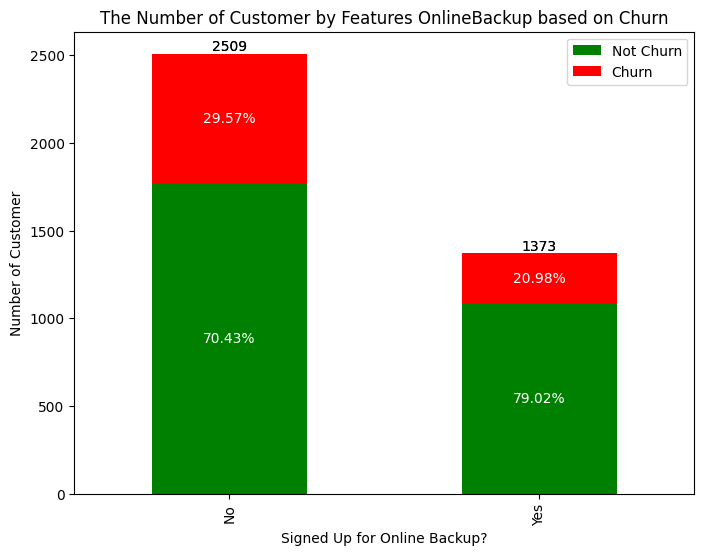

In [ ]:
#Stacked Barplot for OnlineScurity Variable
bar_onlinebackup, chi2_test_onlinebackup, pvt_onlinebackup = create_stacked_chi2(df_train,
                                                                                 'Churn',
                                                                                 'OnlineBackup',
                                                                                 'tenure',
                                                                                 'count')
bar_onlinebackup.set_xlabel('Signed Up for Online Backup?')
# plt.savefig(f'compare onlinebackup.png', transparent=True)
plt.show()

**Customers who churn are less likely to have online backup.**  
The graph shows a significantly higher percentage of customers who churned did not have online backup (79.02%) compared to those who did (20.98%). This suggests that having online backup might be a factor that helps retain customers.

In [ ]:
# Chi Square Test for OnlineBackup vs Churn
print('The Chi-Square test assesses the independence between the "OnlineBackup" feature and the "churn" target variable.')
print('')
print('hypothesis:')
print('H0 :',chi2_test_onlinebackup[0])
print('Ha :',chi2_test_onlinebackup[1])
print('')
print('Pvalue =',chi2_test_onlinebackup[2])
print('')
chi2_test_onlinebackup[3]

The Chi-Square test assesses the independence between the "OnlineBackup" feature and the "churn" target variable.

hypothesis:
H0 : Feature OnlineBackup and Target Churn is independent (have the same proportion)
Ha : Feature OnlineBackup and Target Churn is dependent (have significant differences in proportion)

Pvalue = 8.268670912687649e-09



'H0 is rejected, so we have enough evident that Feature OnlineBackup and Target Churn is dependent (have significant differences in proportion)'

- **Feature DeviceProtection**

Compare the distribution of the `DeviceProtection` variable across the `churn` classes to assess if customers who haven't enabled Device Protection may be more likely to churn than those who have.

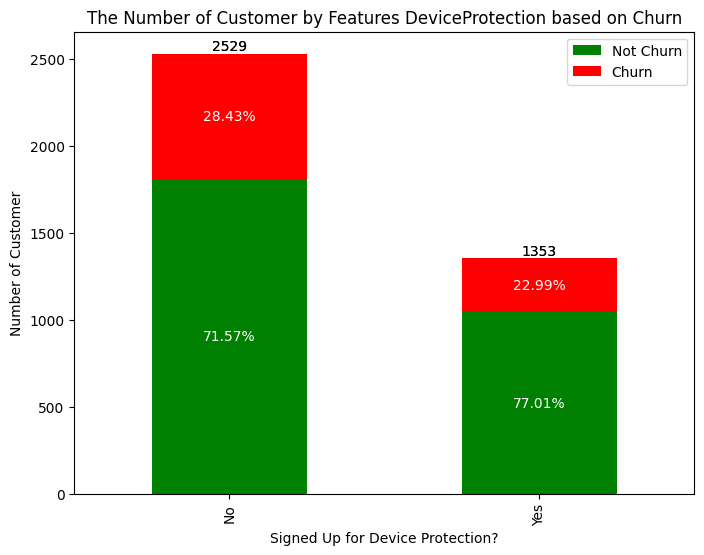

In [ ]:
#Stacked Barplot for DeviceProtection  Variable
bar_deviceprotection, chi2_test_deviceprotection , pvt_deviceprotection= create_stacked_chi2(df_train,
                                                                                             'Churn',
                                                                                             'DeviceProtection',
                                                                                             'tenure',
                                                                                             'count')
bar_deviceprotection.set_xlabel('Signed Up for Device Protection?')
# plt.savefig(f'compare deviceprotection.png', transparent=True)
plt.show()

**Churn rate is higher for customers without device protection**  
The graph shows that a higher percentage of customers who churned did not have device protection (28.43%) compared to those who did (22.99%). This suggests that having device protection might be a factor that helps retain customers.

In [ ]:
# Chi Square Test for OnlineBackup vs Churn
print('The Chi-Square test assesses the independence between the "DeviceProtection" feature and the "churn" target variable.')
print('')
print('hypothesis:')
print('H0 :',chi2_test_deviceprotection[0])
print('Ha :',chi2_test_deviceprotection[1])
print('')
print('Pvalue =',chi2_test_deviceprotection[2])
print('')
chi2_test_deviceprotection[3]

The Chi-Square test assesses the independence between the "DeviceProtection" feature and the "churn" target variable.

hypothesis:
H0 : Feature DeviceProtection and Target Churn is independent (have the same proportion)
Ha : Feature DeviceProtection and Target Churn is dependent (have significant differences in proportion)

Pvalue = 0.00029140487842529663



'H0 is rejected, so we have enough evident that Feature DeviceProtection and Target Churn is dependent (have significant differences in proportion)'

- **Feature TechSupport**

Compare the distribution of the `TechSupport` variable across the `churn` classes to assess if customers who haven't enabled Tech Support may be more likely to churn than those who have.

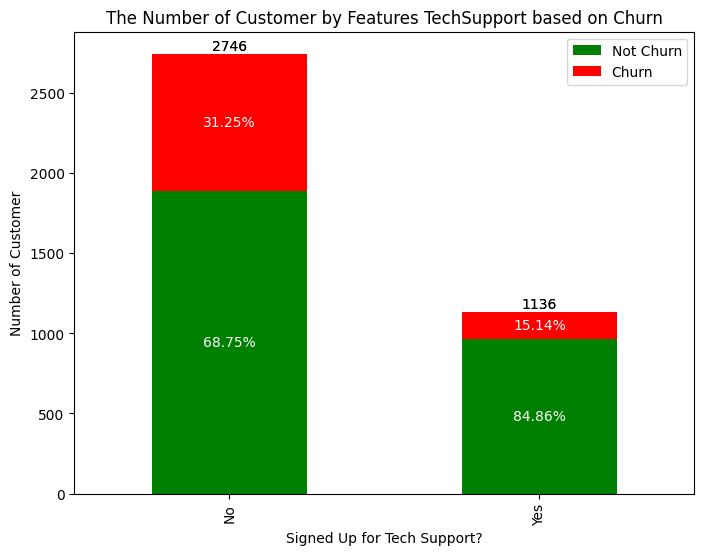

In [ ]:
#Stacked Barplot for TechSupport  Variable
bar_techsupport, chi2_test_techsupport, pvt_techsupport = create_stacked_chi2(df_train,
                                                                              'Churn',
                                                                              'TechSupport',
                                                                              'tenure',
                                                                              'count')
bar_techsupport.set_xlabel('Signed Up for Tech Support?')
# plt.savefig('compare techsupport.png', transparent=True)
plt.show()

**Customers who churn are less likely to have tech support.**

 The graph shows a significantly higher percentage of customers who churned did not have tech support (84.86%) compared to those who did (15.14%). This suggests that having tech support might be a factor that helps retain customers.

In [ ]:
# Chi Square Test for TechSupport vs Churn
print('The Chi-Square test assesses the independence between the "TechSupport" feature and the "churn" target variable.')
print('')
print('hypothesis:')
print('H0 :',chi2_test_techsupport[0])
print('Ha :',chi2_test_techsupport[1])
print('')
print('Pvalue =',chi2_test_techsupport[2])
print('')
chi2_test_techsupport[3]

The Chi-Square test assesses the independence between the "TechSupport" feature and the "churn" target variable.

hypothesis:
H0 : Feature TechSupport and Target Churn is independent (have the same proportion)
Ha : Feature TechSupport and Target Churn is dependent (have significant differences in proportion)

Pvalue = 7.036734728705528e-25



'H0 is rejected, so we have enough evident that Feature TechSupport and Target Churn is dependent (have significant differences in proportion)'

- **Feature PaperlessBilling**

Compare the distribution of the `PaperlessBilling` variable across the `churn` classes to assess if customers who use paperless billing may be more likely to churn than those who receive paper bills

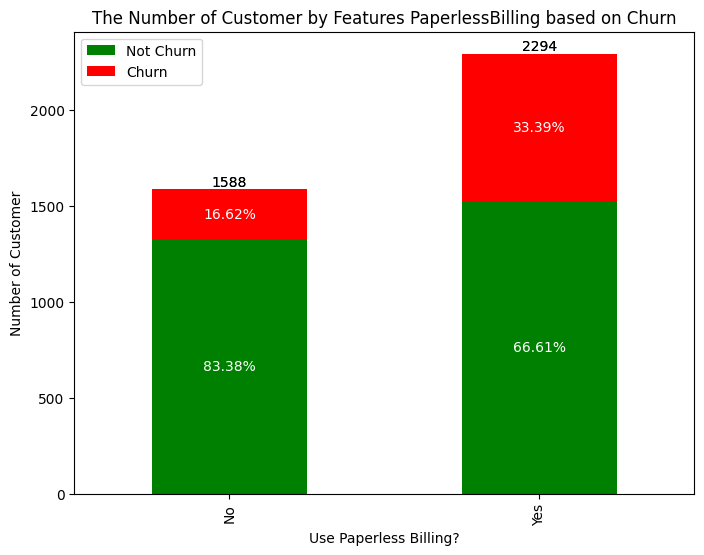

In [ ]:
#Stacked Barplot for PaperlessBilling  Variable
bar_paperlessbilling, chi2_test_paperlessbilling, pvt_paperlessbilling = create_stacked_chi2(df_train,
                                                                                             'Churn',
                                                                                             'PaperlessBilling',
                                                                                             'tenure',
                                                                                             'count')
bar_paperlessbilling.set_xlabel('Use Paperless Billing?')
# plt.savefig('compare paperlessbilling.png', transparent=True)
plt.show()

**Customers who churn are more likely to use paperless billing.**  
The graph shows a higher percentage of customers who churned used paperless billing (33.39%) compared to those who didn't (16.62%). This suggests that using paperless billing might be associated with a higher churn rate.

In [ ]:
# Chi Square Test for PaperlessBilling vs Churn
print('The Chi-Square test assesses the independence between the "PaperlessBilling" feature and the "churn" target variable.')
print('')
print('hypothesis:')
print('H0 :',chi2_test_paperlessbilling[0])
print('Ha :',chi2_test_paperlessbilling[1])
print('')
print('Pvalue =',chi2_test_paperlessbilling[2])
print('')
chi2_test_paperlessbilling[3]

The Chi-Square test assesses the independence between the "PaperlessBilling" feature and the "churn" target variable.

hypothesis:
H0 : Feature PaperlessBilling and Target Churn is independent (have the same proportion)
Ha : Feature PaperlessBilling and Target Churn is dependent (have significant differences in proportion)

Pvalue = 4.297430653583031e-31



'H0 is rejected, so we have enough evident that Feature PaperlessBilling and Target Churn is dependent (have significant differences in proportion)'

- **Feature Contract**

Compare the distribution of the `Contract` variable across the `churn` classes to assess if customers on shorter contracts (month to month) could be at a higher risk of churn compared to those on longer contracts (1 year vs. 2 years).

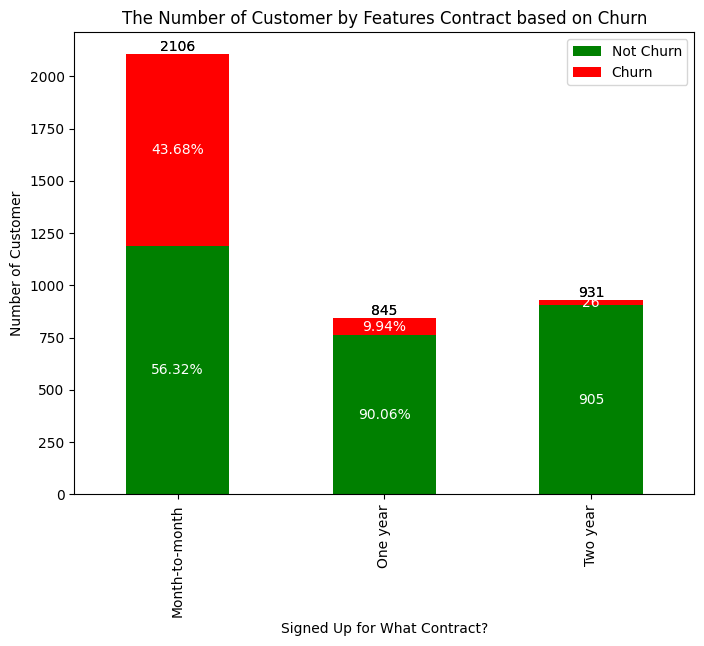

In [ ]:
#Stacked Barplot for Contract  Variable
bar_contract, chi2_test_contract, pvt_contract = create_stacked_chi2(df_train,
                                                                     'Churn',
                                                                     'Contract',
                                                                     'tenure',
                                                                     'count')
bar_contract.set_xlabel('Signed Up for What Contract?')
# plt.savefig('compare contract.png', transparent=True)
plt.show()

**Customers with shorter contracts are more likely to churn.**

The graph shows a clear trend that customers with shorter contract lengths churn at a higher rate. For example, the churn rate for customers on month-to-month contracts is significantly higher (43.68%) compared to those on two-year contracts (2.79%) or one-year contract (9.94%). This suggests that contract length is a strong factor influencing churn rate.

In [ ]:
# Chi Square Test for Contract vs Churn
print('The Chi-Square test assesses the independence between the "Contract" feature and the "churn" target variable.')
print('')
print('hypothesis:')
print('H0 :',chi2_test_contract[0])
print('Ha :',chi2_test_contract[1])
print('')
print('Pvalue =',chi2_test_contract[2])
print('')
chi2_test_contract[3]

The Chi-Square test assesses the independence between the "Contract" feature and the "churn" target variable.

hypothesis:
H0 : Feature Contract and Target Churn is independent (have the same proportion)
Ha : Feature Contract and Target Churn is dependent (have significant differences in proportion)

Pvalue = 4.140287847282055e-154



'H0 is rejected, so we have enough evident that Feature Contract and Target Churn is dependent (have significant differences in proportion)'

- **Feature InternetService**

Compare the distribution of the `InternetService` variable across the `churn` classes to assess if customers who subscribe to internet service may be more likely to churn than those who do not subscribe.

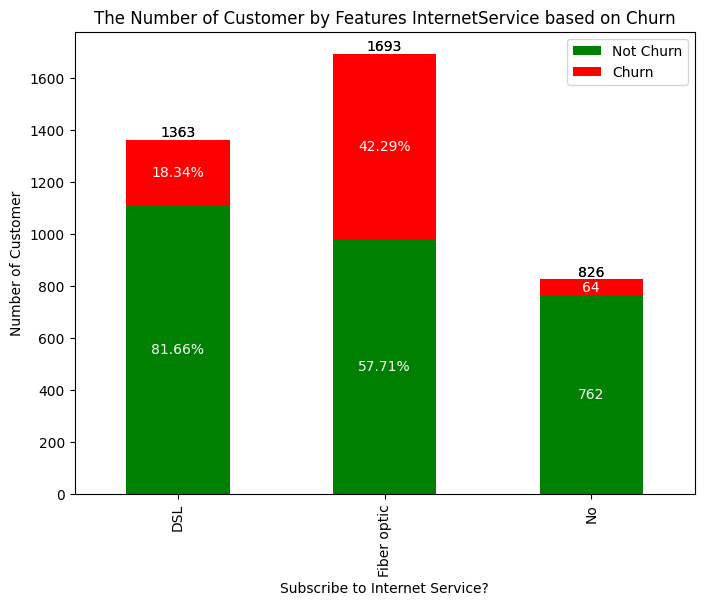

In [ ]:
#Stacked Barplot for InternetService  Variable
bar_InternetService, chi2_test_InternetService, pvt_InternetService = create_stacked_chi2(df_train,
                                                                                          'Churn',
                                                                                          'InternetService',
                                                                                          'tenure',
                                                                                          'count')
bar_InternetService.set_xlabel('Subscribe to Internet Service?')
# plt.savefig('compare InternetService.png', transparent=True)
plt.show()

The graph shows a very high churn rate for customers who subscribe to internet service (18.34% for DSL user and 42.29% for Fiber optic user), compared to those who didn't (1.23%). This suggests that subscribing to internet service is a strong factor influencing churn rate in this case.

In [ ]:
# Chi Square Test for InternetService vs Churn
print('The Chi-Square test assesses the independence between the "InternetService" feature and the "churn" target variable.')
print('')
print('hypothesis:')
print('H0 :',chi2_test_InternetService[0])
print('Ha :',chi2_test_InternetService[1])
print('')
print('Pvalue =',chi2_test_InternetService[2])
print('')
chi2_test_InternetService[3]

The Chi-Square test assesses the independence between the "InternetService" feature and the "churn" target variable.

hypothesis:
H0 : Feature InternetService and Target Churn is independent (have the same proportion)
Ha : Feature InternetService and Target Churn is dependent (have significant differences in proportion)

Pvalue = 3.215505948601176e-90



'H0 is rejected, so we have enough evident that Feature InternetService and Target Churn is dependent (have significant differences in proportion)'

# 3. Data Preparation and Feature Engineering

## 3.1 Initialization

This step involves determine the necessary module for data preprocessing, modeling, evaluation, and other parameter that needed. This ensures all the tools we need are readily available for building and tuning the churn classification model.

In [ ]:
# Initialization
#Metrics (recall score)
metric = make_scorer(recall_score)

#Parameter
rs=48
split_size = 0.2

#Scaler
min_max = MinMaxScaler()
robust = RobustScaler()

#Encoder
ohe = OneHotEncoder()

#Sampling
ros = RandomOverSampler(random_state=rs)
smote = SMOTE(random_state=rs)

#Other Preprocessing
# binning = KBinsDiscretizer()
select_feature = SelectFwe()

#Cross Validation
skf = StratifiedKFold()

#Model
logreg = LogisticRegression(random_state=48)
dt = DecisionTreeClassifier(random_state=48)
svc = SVC(random_state=48,probability=True) #Agar moder dapat memprediksi probailitasnya
knn = KNeighborsClassifier()

# Ensamble model
stack_ensamble = StackingClassifier(estimators=[('KNN',KNeighborsClassifier()),
                                       ('Decision Tree',DecisionTreeClassifier(random_state=rs)),
                                       ('Logistic Regression',LogisticRegression(random_state=rs))])

voting_ensamble = VotingClassifier(estimators=[('KNN',KNeighborsClassifier()),
                                       ('Decision Tree',DecisionTreeClassifier(random_state=rs)),
                                       ('Logistic Regression',LogisticRegression(random_state=rs))],
                          voting='soft')
rf = RandomForestClassifier(random_state=rs)
bagging = BaggingClassifier(random_state=rs,estimator=LogisticRegression())
gbs = GradientBoostingClassifier(random_state=rs)
xgboost = XGBClassifier(random_state=rs)
lgbm = LGBMClassifier(random_state=rs)

We can break down the customer churn classification model building process into several key steps. Here's how we'll approach it:

- Data Preprocessing:  
This involves cleaning and preparing the data for modeling. We'll use techniques like scaling and encoding for numerical and categorical features respectively. we'll employ scaling techniques like Min-Max, Standard, and Robust whlie for encoding techniques we'll use One Hot, Ordinal and Binnary.

- Cross-Validation:  
To ensure robust model evaluation, we'll employ cross-validation techniques like Stratified KFold because distribution of class for target is imbalanced. This helps assess the model's generalizability beyond the training data.

- Model Selection:  
We'll explore different models like Logistic Regression, Random Forest, or XGBoost. Each model will be trained on a portion of the data and evaluated on another to identify the best performer.

- Ensemble Modeling (Optional):  
If necessary, we can explore combining multiple models through techniques like voting and stacking or bagging and boosting to potentially improve overall performance.

- Metric Evaluation:  
We'll use relevant metrics like recall or ROC-AUC score to assess the final model's performance on unseen data.

In [ ]:
#Data Preparation method and model to be used
list_scaler = [
    robust,
    min_max
]

list_encoder = [
    ohe
]

list_feature_selection = [
    select_feature
]

list_resampler = [
    ros,
    smote
]

list_classifier = [
    logreg,
    dt,
    svc,
    knn,
    stack_ensamble,
    rf,
    bagging,
    gbs,
    xgboost
]

## 3.2 Data Preparation
Data preparation, also known as data preprocessing, is crucial for machine learning. It's the process of transforming raw data into a usable format that machine learning algorithms can understand and work with effectively.

To prepare our data for analysis, we'll follow a four-step process (Encoding, Scaling, Feature Selection, Resampling):


1. Encoding Categorical Features  
Encoding is method to convert categorical feature into numbers (numerical feature) that suitable for machine learning algorithms.  
Since the categorical features used in this analysis have low cardinality (**few unique categories**) and the data within these features is **nominal** (categories have no inherent order), **one-hot encoding** is a suitable choice for encoding them.
2. Scaling Numerical Features  
Scaling is a method for converting the range of numerical features to a similar scale. This reduces the variation between features, making it easier for machine learning algorithms to process the data.  
Since the numerical features used in this analysis are **ratio scale** data and **don't contain outliers** and **not normally distributed**, both **Min-Max Scaler** and **Robust Scaler** could be suitable choices for scaling them.
3. Select the Most Informative Features  
We'll identify and choose the features that hold the most predictive power for our specific task. This can help improve model performance and efficiency. The chosen feature selection method is SelectFWE, which utilizes the f-score to evaluate features. We will compare its performance against a baseline significance level of alpha=0.05.
4. Resample the Data  
Depending on the distribution of our data, we might need to resample it to address imbalances or ensure the training set accurately reflects the real world. Since we're primarily interested in predicting customer churn (target = 1), which is the underrepresented class in our data, oversampling will be a good technique to balance the data.

### 3.2.1 Column Transformer

The encoding and scaling processes will be combined using a ColumnTransformer to simplify feature transformation.

In [ ]:
#Column Transformer to transform feature into suitable form for machine learning
transformer = ColumnTransformer(transformers=[
    ("Scaling",min_max,X_train.select_dtypes('number').columns), #Scaling numerical feature
    ("Encoding",ohe,X_train.select_dtypes('object').columns) #Encoding categgorical feature
],remainder='Passthrough')

#### **One-hot encoding**
is a technique used to convert categorical data (like text labels) into a numerical format suitable for machine learning algorithms. It works by creating a new binary (0 / 1) feature for each unique category within the original feature.

How it works:

For each unique category in the original feature, a new binary feature is created.
The value of the new feature is set to 1 for data points that belong to the corresponding category, and 0 for all other data points.
This essentially creates a "one-hot" vector for each data point, where only one element is 1, indicating the category it belongs to.

Benefits:

- Makes categorical data understandable by machine learning models.
- Preserves the categorical information without assuming an order between categories.

Drawbacks:

- Can significantly increase the number of features, especially for features with many unique categories.

- Scale Numerical Features:  
We'll ensure all numerical features are on a similar scale to prevent any one feature from dominating the model during training. This can be done through scaling or normalization techniques.


#### **Min - Max Scaler**
is a data preprocessing technique commonly used to normalize numerical features into a specific range, typically between 0 and 1. This transformation improves the efficiency and performance of many machine learning algorithms

How it works:

Subtracts the minimum value from each data point and then divides by the range (difference between the maximum and minimum values). The result is a new value between 0 and 1 that represents the relative position of the original data point within the original data's range.

- Formula :  
<center>
data transformed = (data value - minimum value in the data) / (maximum value in the data - minimum value in the data)

Benefits :
- Improves the efficiency and performance of many machine learning algorithms
- Ensuring all features contribute proportionally during machine learning model training.

Drawsback :
- If outliers are present, they can significantly influence the scaling range and distort the distribution of the scaled features.

#### Robust Scaler
is a data preprocessing technique commonly used to normalize numerical features into a specific range, typically it used when the data has outliers that might distort the behavior of algorithms sensitive to feature scales.

How it works:

- Centering by Median: Instead of the mean, it subtracts the median from each feature. The median represents the "center" of the data, unaffected by outliers on either side.
- Scaling by Interquartile Range (IQR): Rather than the standard deviation, it uses the IQR (difference between the 1st and 3rd quartiles). IQR represents the middle 50% of the data, making it less sensitive to outliers.

-Formula:
<center>
data transformed = (data value - median in the data) / (Interquartile Range data)

- Resample the Data (if necessary):  


### 3.2.2 Feature Selection
Feature selection helps improve the performance of machine learning models by selecting only the features that have a significant impact on the model's predictions. Irrelevant features are removed, resulting in a more focused and accurate model.

How it works:
- Picking the Important Stuff: It analyzes all the available features, but not all feture are equally important for model. Feature selection identifies the features that have the strongest influence on model.
- A Leaner, Meaner Model: By removing features that don't significantly affect predictions, feature selection helps create a more streamlined model. This makes the model work faster and can even improve its accuracy by focusing on the most relevant feature.

In [ ]:
#Feature selection using SelectFwe based on F ANOVA value and alpha 0.05
SelectFwe(score_func=f_classif, alpha=0.05)

SelectFwe()

SelectFWE, a feature selection method, identifies the most relevant features for your model. It achieves this by calculating an f-score (like an ANOVA score) for each feature. This score indicates how much influence a feature has on the target variable you're trying to predict.

Here's where the alpha (0.05) comes in. It acts like a cutoff point. Features with f-scores lower than alpha are considered to have weak influences and are removed. This ensures your model focuses on the most impactful features, ultimately leading to a more accurate and efficient model.

### 3.2.3 Resampling

Resampling is a statistical technique used to dealing with imbalanced datasets. It involves creating new samples from existing data to improve the generalizability and performance of machine learning models.

In [ ]:
#Resampling using over sampling method
RandomOverSampler(random_state=48)

RandomOverSampler(random_state=48)

OverSampling Method is method to duplicates or creates synthetic data points for the minority class to achieve a more balanced distribution.

### 3.2.4 Pipeline

Based on data preparation explanation above, we'll create a machine learning pipeline function. This streamlined approach will facilitate experimentation with various training methods. Our goal is to identify the optimal model for customer churn classification.

In [ ]:
#Function untuk membuat pipeline
def create_pipeline(classifier:object,
                    scaling_method:object=None,
                    feature_scaling:list=None,
                    encoding_method:object=None,
                    feature_encoding:list=None,
                    fselection_method:object=None,
                    sampling_method:object=None):
  """
  Create Pipeline for Classification
  ==================================
  Function for creating Pipeline from columns transformer, resampling and classification.

  arg:
  classifier : Classification method.
  scaling_method : The scaling method used if you want to scale numerical features.
  feature_scaling : Features that will be scaled with the given scaling method.
  encoding_method : The encoding method used when encoding categorical features.
  feature_encoding : Features that will be encoded with the given scaling method.
  fselection_method : The feature selection method used if you want to select best feature before modeling.
  sampling_method : Sampling method if you want to carry out resampling because imbalanced data.
  """
  #Create Column Transformer based on data requirements
  create_transformer = []
  if (encoding_method is not None) and (feature_encoding is not None):
    create_transformer.append(('Encoding', encoding_method, feature_encoding))
  if (scaling_method is not None) and (feature_scaling is not None):
    create_transformer.append(('Scaling',scaling_method,feature_scaling))
  transformer = ColumnTransformer(transformers=create_transformer,remainder='drop')

  #Create steps that used in Pipeline
  list_steps = [
      ('Data_Preprocesing', transformer),
      ('Classifier', classifier)
  ]
  #Add feature selection if used
  if fselection_method is not None:
    list_steps.insert(1, ('Feature_Selection',fselection_method))
  #Add resampling if used
  if sampling_method is not None:
    list_steps.insert(2, ('Resampling',sampling_method))

  #Create pipeline using IMB_pipeline module
  classification = imb_pipeline(steps=list_steps)

  return classification

### 3.2.5 Testing Pipeline

Test to verify the functionality of the pipeline builder function using base model parameters.

In [ ]:
#Create Testing Model with Pipeline Creator
pipe_classifier = create_pipeline(classifier=logreg,
                    scaling_method=robust,
                    feature_scaling=X_train.select_dtypes('number').columns,
                    encoding_method=ohe,
                    feature_encoding=X_train.select_dtypes('object').columns,
                    fselection_method=select_feature,
                    sampling_method=ros)
pipe_classifier

Pipeline(steps=[('Data_Preprocesing',
                 ColumnTransformer(transformers=[('Encoding', OneHotEncoder(),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                 ('Scaling', RobustScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object'))])),
                ('Feature_Selection', SelectFwe()),
                ('Resampling', RandomOverSampler(random_state=48)),
                ('Classifier', LogisticRegression(random_state=48))])

In [ ]:
#training testing model to X_train and Y_Train
pipe_classifier.fit(X_train,y_train)

Pipeline(steps=[('Data_Preprocesing',
                 ColumnTransformer(transformers=[('Encoding', OneHotEncoder(),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                 ('Scaling', RobustScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object'))])),
                ('Feature_Selection', SelectFwe()),
                ('Resampling', RandomOverSampler(random_state=48)),
                ('Classifier', LogisticRegression(random_state=48))])

In [ ]:
#Checking testing model performance
print('Classification report :')
print(classification_report(y_train,pipe_classifier.predict(X_train)))

Classification report :
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      2852
           1       0.52      0.80      0.63      1030

    accuracy                           0.75      3882
   macro avg       0.71      0.77      0.72      3882
weighted avg       0.81      0.75      0.76      3882



The function work properly.

# 4. Model Development

Our machine learning model will begin with feature transformation to optimize the data for modeling. Next, we'll use feature selection to identify the most impactful features. To address potential data imbalances, a resampling process will be employed. Finally, we'll leverage the prepared data to build our machine learning model.

To identify the optimal model for customer churn classification, we'll conduct experiments that explore various scaling methods, resampling techniques, and classification algorithms based on the explanation of the data preparation above.

In [ ]:
print('Method that used to experiment')
print("Encoding Method :",pd.Series(list_encoder),sep='\n')
print('')
print("Scaling Method :",pd.Series(list_scaler),sep='\n')
print('')
print("Feature Selection Method :",pd.Series(list_feature_selection),sep='\n')
print('')
print("Resampling Method :",pd.Series(list_resampler),sep='\n')
print('')
print("Classification Method :",pd.Series(list_classifier),sep='\n')

Method that used to experiment
Encoding Method :
0    OneHotEncoder(drop='first')
dtype: object

Scaling Method :
0    RobustScaler()
1    MinMaxScaler()
dtype: object

Feature Selection Method :
0    SelectFwe()
dtype: object

Resampling Method :
0    RandomOverSampler(random_state=48)
1                SMOTE(random_state=48)
dtype: object

Classification Method :
0                  LogisticRegression(random_state=48)
1              DecisionTreeClassifier(random_state=48)
2               SVC(probability=True, random_state=48)
3                               KNeighborsClassifier()
4    StackingClassifier(estimators=[('KNN', KNeighb...
5              RandomForestClassifier(random_state=48)
6    BaggingClassifier(estimator=LogisticRegression...
7          GradientBoostingClassifier(random_state=48)
8    XGBClassifier(base_score=None, booster=None, c...
dtype: object


## 4.1 Model Benchmarking

To assess the real-world performance of our best model, we'll leverage a **cross-validation** technique. This method ensures the model performs well on unseen data by splitting the data into multiple sets and testing on unseen portions.

We'll be using **stratified k-fold** cross-validation to evaluate our model's performance. This technique is particularly useful for imbalanced datasets because it ensures each fold (subset) maintains the same class distribution as the original data.

In [ ]:
#Function to cross validate each model that willl be experimented
def cross_validation (classifier, X_train, y_train):
  cv_result = cross_validate(classifier, X_train,y_train,scoring=metric,cv=StratifiedKFold(),return_train_score=True)
  return {'mean_test_score':np.mean(cv_result['test_score']),
          'std_test_score':np.std(cv_result['test_score']),
          'mean_train_score':np.mean(cv_result['train_score']),
          'std_train_score':np.std(cv_result['train_score']),}

In [ ]:
print("Total Experiment :", len(list_classifier)*len(list_scaler)*len(list_resampler))

#variable for storing model experiment results
benchmark_result = defaultdict(list)
counter = 0
best_score = -1
best_classifier = None

#for loop algorithm to experiment model with predefined parameters
for model in list_classifier:
  for scalings in list_scaler:
    for resampling in list_resampler:
      #Create machine learning pipeline for each experiment
      pipe_classifier = create_pipeline(
        classifier=model,
        scaling_method=scalings,
        feature_scaling=X_train.select_dtypes('number').columns,
        encoding_method=ohe,
        feature_encoding=X_train.select_dtypes('object').columns,
        fselection_method=select_feature,
        sampling_method=resampling
      )
      #Evaluate the machine learning with crossvalidation
      cv_result = cross_validation(pipe_classifier,X_train,y_train)

      #saving model experiment results
      benchmark_result['model'].append(model)
      benchmark_result['scaler'].append(scalings)
      benchmark_result['resampling'].append(resampling)

      benchmark_result['mean_test_score'].append(cv_result['mean_test_score'])
      benchmark_result['std_test_score'].append(cv_result['std_test_score'])
      benchmark_result['mean_train_score'].append(cv_result['mean_train_score'])
      benchmark_result['std_train_score'].append(cv_result['std_train_score'])
      benchmark_result['estimator'].append(pipe_classifier)

      #Find the best model
      if(cv_result['mean_test_score']>best_score):
        best_score=cv_result['mean_test_score']
        best_classifier=pipe_classifier.fit(X_train,y_train)

Total Experiment : 36


In [ ]:
#Result of Benchmarking Model
result = pd.DataFrame(benchmark_result)
result.sort_values('mean_test_score',ascending=False).head(10)

,model,scaler,resampling,mean_test_score,std_test_score,mean_train_score,std_train_score,estimator
3,LogisticRegression(random_state=48),MinMaxScaler(),SMOTE(random_state=48),0.804854,0.012433,0.806796,0.006486,"(ColumnTransformer(transformers=[('Encoding', ..."
1,LogisticRegression(random_state=48),RobustScaler(),SMOTE(random_state=48),0.803883,0.011322,0.806068,0.005916,"(ColumnTransformer(transformers=[('Encoding', ..."
2,LogisticRegression(random_state=48),MinMaxScaler(),RandomOverSampler(random_state=48),0.801942,0.015473,0.807282,0.005395,"(ColumnTransformer(transformers=[('Encoding', ..."
26,BaggingClassifier(estimator=LogisticRegression...,MinMaxScaler(),RandomOverSampler(random_state=48),0.801942,0.014203,0.805583,0.005503,"(ColumnTransformer(transformers=[('Encoding', ..."
24,BaggingClassifier(estimator=LogisticRegression...,RobustScaler(),RandomOverSampler(random_state=48),0.801942,0.014531,0.805340,0.005068,"(ColumnTransformer(transformers=[('Encoding', ..."
0,LogisticRegression(random_state=48),RobustScaler(),RandomOverSampler(random_state=48),0.800971,0.016816,0.806553,0.005926,"(ColumnTransformer(transformers=[('Encoding', ..."
8,"SVC(probability=True, random_state=48)",RobustScaler(),RandomOverSampler(random_state=48),0.800971,0.019659,0.850485,0.018443,"(ColumnTransformer(transformers=[('Encoding', ..."
25,BaggingClassifier(estimator=LogisticRegression...,RobustScaler(),SMOTE(random_state=48),0.800000,0.013523,0.803398,0.004669,"(ColumnTransformer(transformers=[('Encoding', ..."
27,BaggingClassifier(estimator=LogisticRegression...,MinMaxScaler(),SMOTE(random_state=48),0.798058,0.013241,0.802427,0.005172,"(ColumnTransformer(transformers=[('Encoding', ..."
9,"SVC(probability=True, random_state=48)",RobustScaler(),SMOTE(random_state=48),0.797087,0.027700,0.839563,0.014752,"(ColumnTransformer(transformers=[('Encoding', ..."


- The benchmarking results identify Support Vector Machine (SVM), Logistic Regression, and Bagging Ensemble models as the top performers model with **high recall value**.
- Since the **recall performance** of the models is **similar**, we will **prioritize simpler models** for efficiency. Logistic Regression and Support Vector Machines are good candidates.
- We will then tune **Logistic Regression** and **Support Vector Machines**'s hyperparameters to optimize their performance.

#### Best Model (Logreg)

The base logistic regression model undergoes this several preprocessing steps:

- Encoding: One-Hot Encoding
- Scaling: Min-Max scaling
- Feature Selection: f_classif for ANOVA (Analysis of Variance)
- Resampling: The Smote technique

In [ ]:
#Pipeline Parameter for best Logreg
model = logreg
scaler = min_max
encoder = ohe
f_selection = select_feature
resampler = smote

In [ ]:
#Training best logreg with data training
base_logreg =create_pipeline(
            classifier=model,
            scaling_method=scaler,
            feature_scaling=X_train.select_dtypes('number').columns,
            encoding_method=encoder,
            feature_encoding=X_train.select_dtypes('object').columns,
            fselection_method=f_selection,
            sampling_method=resampler)
base_logreg.fit(X_train,y_train)

Pipeline(steps=[('Data_Preprocesing',
                 ColumnTransformer(transformers=[('Encoding', OneHotEncoder(),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                 ('Scaling', MinMaxScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object'))])),
                ('Feature_Selection', SelectFwe()),
                ('Resampling', SMOTE(random_state=48)),
                ('Classifier', LogisticRegression(random_state=48))])

In [ ]:
#Best logreg model performance
print('Classification report :')
print(classification_report(y_train,base_logreg.predict(X_train)))

Classification report :
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      2852
           1       0.52      0.80      0.63      1030

    accuracy                           0.75      3882
   macro avg       0.71      0.77      0.72      3882
weighted avg       0.81      0.75      0.76      3882



The base logistic regression model achieves an 80% recall, indicating it can correctly identify 80 out of every 100 customers who will churn. This is a promising result.

Since a good base model has been established, we can leverage hyperparameter tuning to squeeze out even better performance from the logistic regression model.

#### Best Model (SVC)

The base support vector machine classifier (SVC) model undergoes this several preprocessing steps:

- Encoding: One-Hot Encoding
- Scaling: Robust scaling
- Feature Selection: f_classif for ANOVA (Analysis of Variance)
- Resampling: The Random Over Sampler technique

In [ ]:
#Pipeline Parameter for SVC
model = svc
scaler = robust
encoder = ohe
f_selection = select_feature
resampler = ros

In [ ]:
#Training best svc model with data training
base_svc = create_pipeline(
            classifier=model,
            scaling_method=scaler,
            feature_scaling=X_train.select_dtypes('number').columns,
            encoding_method=encoder,
            feature_encoding=X_train.select_dtypes('object').columns,
            fselection_method=f_selection,
            sampling_method=resampler
        )
base_svc.fit(X_train,y_train)

Pipeline(steps=[('Data_Preprocesing',
                 ColumnTransformer(transformers=[('Encoding', OneHotEncoder(),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                 ('Scaling', MinMaxScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object'))])),
                ('Feature_Selection', SelectFwe()),
                ('Resampling', SMOTE(random_state=48)),
                ('Classifier', LogisticRegression(random_state=48))])

In [ ]:
#Best svc model performance
print('Classification report :')
print(classification_report(y_train,base_svc.predict(X_train)))

Classification report :
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      2852
           1       0.53      0.81      0.64      1030

    accuracy                           0.76      3882
   macro avg       0.72      0.77      0.73      3882
weighted avg       0.81      0.76      0.77      3882



The base SVC model achieves an 81% recall, indicating it can correctly identify 81 out of every 100 customers who will churn. This is a promising result.

Since a good base model has been established, we can leverage hyperparameter tuning to squeeze out even better performance from the SVC model.

## 4.2 Model Improvement

We can further enhance the performance of the chosen model through a process called hyperparameter tuning. This involves systematically evaluating the model's performance with different parameter combinations. The goal is to identify the combination that yields the best performance on a pre-defined evaluation metric.

### 4.2.1 Tuning Logreg Model

for logistic regression model, we will tuning these parameter:
- Penalty  
also known as regularization, is a technique used to control the complexity of the model and prevent overfitting.
- C   
also known as the inverse regularization parameter, it directly influences the strength of the regularization penalty applied during training.
- Class Weight
The class weight parameter allows you to specify weights for each class in your dataset. These weights influence the cost function that the model tries to minimize during training.
- Solver  
The solver parameter is a critical decision that influences how the model efficiently finds the optimal parameters (coefficients) that minimize the cost function.  The solver essentially determines the optimization algorithm used during the training process.
- Tolerance  
The tolerance parameter acts as a stopping criterion for the optimization algorithm used during training. It essentially defines the level of precision required for the model to consider itself "converged" and stop searching for the optimal parameters (coefficients).

In [ ]:
#Parameter that will be use to tuning logreg model
param_space = {
    'Classifier__penalty' : ['l1','l2','elasticnet'],
    'Classifier__tol' : [1e-4,1e-2,1,10],
    'Classifier__C' : [1, 10, 0.1, 0.01],
    'Classifier__class_weight' : [None, 'balanced'],
    'Classifier__solver' : ['liblinear', 'lbfgs', 'newton-cholesky'],
    'Classifier__max_iter': [1000]
}

In [ ]:
#Hyperparameter tuning using Gridsearch CV to try all combination parameter for Logreg model
grid_search = GridSearchCV(
    estimator=base_logreg, #Diambil dari pipeline yang didalamnya ada model klasifikasinya
    param_grid=param_space, #Rentang pencarian nilai
    scoring=metric,#Metrik yang akan digunakan dalam proses bencmarking
    # refit='roc_auc', #memlih model dengan metriks terbaik
    cv=skf, #Metode cross validation
    return_train_score=True, #Melihat nilai dari data train
    verbose=1,
)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Data_Preprocesing',
                                        ColumnTransformer(transformers=[('Encoding',
                                                                         OneHotEncoder(),
                                                                         Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                                        ('Scaling',
                                                                         MinMa...
                                        LogisticRegression(random_state=48))]),
             param_grid={'Classifier__C': [1, 10, 0.1, 0.01],
                         'Classifier__class_weight': [None, 'balanced'],
                         'Classifier__max_iter': [1000],
                         'Classifier__penalty': ['l1', 'l2', 'elasticnet'],
                         'Classifier__solver': ['liblinear', 'lbfgs',
                                                'newton-cholesky'],
                         'Classifier__tol': [0.0001, 0.01, 1, 10]},
             return_train_score=True, scoring=make_scorer(recall_score),
             verbose=1)

In [ ]:
#Besr recall score from model using all combination parameter
grid_search.best_score_

0.8563106796116504

In [ ]:
#Logreg model after tuning
grid_search.best_estimator_

Pipeline(steps=[('Data_Preprocesing',
                 ColumnTransformer(transformers=[('Encoding', OneHotEncoder(),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                 ('Scaling', MinMaxScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object'))])),
                ('Feature_Selection', SelectFwe()),
                ('Resampling', SMOTE(random_state=48)),
                ('Classifier',
                 LogisticRegression(C=0.01, max_iter=1000, penalty='l1',
                                    random_state=48, solver='liblinear',
                                    tol=0.01))])

The hyperparameter tuning process for the logistic regression model yielded a best recall score of 85%. The following parameters achieved this result:

In [ ]:
#Parameter for tuning logreg
penalty = 'l1'
tol = 0.01
C = 0.01
class_weight = None
solver ='liblinear'
max_iter =1000

In [ ]:
#Training Logreg model with data training
tuning_logreg =create_pipeline(
            classifier=LogisticRegression(penalty=penalty,tol=tol,C=C,class_weight=class_weight,solver=solver,max_iter=1000),
            scaling_method=scaler,
            feature_scaling=X_train.select_dtypes('number').columns,
            encoding_method=encoder,
            feature_encoding=X_train.select_dtypes('object').columns,
            fselection_method=f_selection,
            sampling_method=resampler
        )
tuning_logreg.fit(X_train,y_train)

Pipeline(steps=[('Data_Preprocesing',
                 ColumnTransformer(transformers=[('Encoding', OneHotEncoder(),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                 ('Scaling', MinMaxScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object'))])),
                ('Feature_Selection', SelectFwe()),
                ('Resampling', SMOTE(random_state=48)),
                ('Classifier',
                 LogisticRegression(C=0.01, max_iter=1000, penalty='l1',
                                    solver='liblinear', tol=0.01))])

Performance comparison of basic regression model with tuning regression model:

In [ ]:
#Logreg model before tuning performance
print('Base Logreg Classification Report :')
print(classification_report(y_train,base_logreg.predict(X_train)))

Base Logreg Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      2852
           1       0.52      0.80      0.63      1030

    accuracy                           0.75      3882
   macro avg       0.71      0.77      0.72      3882
weighted avg       0.81      0.75      0.76      3882



In [ ]:
#Logreg model after tuning performance
print('Tuning Logreg Classification report :')
print(classification_report(y_train,tuning_logreg.predict(X_train)))

Tuning Logreg Classification report :
              precision    recall  f1-score   support

           0       0.93      0.68      0.78      2852
           1       0.49      0.85      0.62      1030

    accuracy                           0.72      3882
   macro avg       0.71      0.76      0.70      3882
weighted avg       0.81      0.72      0.74      3882



Hyperparameter tuning significantly improved the recall performance of the regression model, achieving a 5% increase. As a result, the tuned model is now considered the best performing model.

### 4.2.2 Tuning SVC Model

for SVC model, we will tuning these parameter:
- Kernel  
The kernel parameter in an SVM classifier plays a crucial role in how the model transforms data and learns decision boundaries.
- C   
also known as the inverse regularization parameter, it directly influences the strength of the regularization penalty applied during training.
- Gamma
the gamma parameter plays a critical role in shaping the decision boundary, particularly when using non-linear kernels.
- Tolerance  
The tolerance parameter acts as a stopping criterion for the optimization algorithm used during training. It essentially defines the level of precision required for the model to consider itself "converged" and stop searching for the optimal parameters (coefficients).

In [ ]:
#Parameter that will be use to tuning svc model
param_space = {
    'Classifier__C' : [0.1, 0.01, 0.001],
    'Classifier__kernel' : ['rbf', 'linier', 'poly'],
    'Classifier__tol': [1e-4,1e-2,1,10],
    'Classifier__gamma':['scale','auto',0.1,1]
}

In [ ]:
#Hyperparameter tuning using Gridsearch CV to try all combination parameter for Logreg model
grid_search_svc = GridSearchCV(
    estimator=base_svc, #Diambil dari pipeline yang didalamnya ada model klasifikasinya
    param_grid=param_space, #Rentang pencarian nilai
    scoring=metric,#Metrik yang akan digunakan dalam proses bencmarking
    # refit='roc_auc', #memlih model dengan metriks terbaik
    cv=skf, #Metode cross validation
    return_train_score=True, #Melihat nilai dari data train
    verbose=1,
)
grid_search_svc.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Data_Preprocesing',
                                        ColumnTransformer(transformers=[('Encoding',
                                                                         OneHotEncoder(),
                                                                         Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                                        ('Scaling',
                                                                         Robus...
                                       ('Feature_Selection', SelectFwe()),
                                       ('Resampling',
                                        RandomOverSampler(random_state=48)),
                                       ('Classifier',
                                        SVC(probability=True,
                                            random_state=48))]),
             param_grid={'Classifier__C': [0.1, 0.01, 0.001],
                         'Classifier__gamma': ['scale', 'auto', 0.1, 1],
                         'Classifier__kernel': ['rbf', 'linier', 'poly'],
                         'Classifier__tol': [0.0001, 0.01, 1, 10]},
             return_train_score=True, scoring=make_scorer(recall_score),
             verbose=1)

In [ ]:
#Best recall score from hyperparameter tuning
grid_search_svc.best_score_

1.0

In [ ]:
#Logreg model after tuning
grid_search_svc.best_estimator_

Pipeline(steps=[('Data_Preprocesing',
                 ColumnTransformer(transformers=[('Encoding', OneHotEncoder(),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                 ('Scaling', RobustScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object'))])),
                ('Feature_Selection', SelectFwe()),
                ('Resampling', RandomOverSampler(random_state=48)),
                ('Classifier',
                 SVC(C=0.1, probability=True, random_state=48, tol=10))])

The hyperparameter tuning process for the SVC model yielded a best recall score of 100%. The following parameters achieved this result:

In [ ]:
#Parameter for tuning svc
C = 0.1
kernel = 'rbf'
tol = 10

In [ ]:
#Training tuning svc model with data train
tuning_svc =create_pipeline(
            classifier=SVC(tol=tol,C=C,kernel=kernel,probability=True,random_state=48),
            scaling_method=scaler,
            feature_scaling=X_train.select_dtypes('number').columns,
            encoding_method=encoder,
            feature_encoding=X_train.select_dtypes('object').columns,
            fselection_method=f_selection,
            sampling_method=resampler
        )
tuning_svc.fit(X_train,y_train)

Pipeline(steps=[('Data_Preprocesing',
                 ColumnTransformer(transformers=[('Encoding', OneHotEncoder(),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                 ('Scaling', MinMaxScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object'))])),
                ('Feature_Selection', SelectFwe()),
                ('Resampling', SMOTE(random_state=48)),
                ('Classifier',
                 SVC(C=0.1, probability=True, random_state=48, tol=10))])

Performance comparison of basic regression model with tuning regression model:

In [ ]:
#SVC model before tuning performance
print('Base SVC Classification Report :')
print(classification_report(y_train,base_svc.predict(X_train)))

Base SVC Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      2852
           1       0.53      0.81      0.64      1030

    accuracy                           0.76      3882
   macro avg       0.72      0.78      0.73      3882
weighted avg       0.81      0.76      0.77      3882



In [ ]:
#SVC model before tuning performance
print('Tuning SVC Classification report :')
print(classification_report(y_train,tuning_svc.predict(X_train)))

Tuning SVC Classification report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2852
           1       0.27      1.00      0.42      1030

    accuracy                           0.27      3882
   macro avg       0.13      0.50      0.21      3882
weighted avg       0.07      0.27      0.11      3882



Our parameter tuning for the SVC model to predict customer churn revealed an interesting anomaly. While the model achieved a perfect recall (1) for identifying churning customers (class 1), the precision for this class was very low, close to 0. Conversely, the model's precision and recall for predicting non-churning customers (class 0) were both 0. This suggests the model overwhelmingly predicts all data points as churning customers (class 1). Due to this bias, the model's performance is not suitable for real-world applications.

## 4.3 Model Evaluation


Model evaluation is crucial for assessing the generalizability of our tuned model. This process involves testing the model's performance on unseen data to identify potential overfitting. Overfitting occurs when the model memorizes the training data too closely, leading to decreased performance on new, real-world examples. By evaluating the model on testing data, we can determine if it can effectively predict outcomes for unseen scenarios, simulating its real-world application.

### 4.3.1 Evaluation on Logreg Model

In [ ]:
#Test performence on data testing
y_pred_test = tuning_logreg.predict(X_test)
print('Classification report :')
print(classification_report(y_test,y_pred_test))

Classification report :
              precision    recall  f1-score   support

           0       0.92      0.62      0.74       713
           1       0.45      0.85      0.59       258

    accuracy                           0.68       971
   macro avg       0.68      0.74      0.67       971
weighted avg       0.80      0.68      0.70       971



Our tuned logistic regression model demonstrates promising results in predicting customer churn on unseen testing data. This is evidenced by its high recall value of 0.85. In simpler terms, for every 100 actual churning customers in new real-world data, the model can correctly identify 85 of them. Furthermore, this recall value remains consistent with the training data, suggesting minimal overfitting. This implies that the model's performance is likely to generalize well to future real-world scenarios.

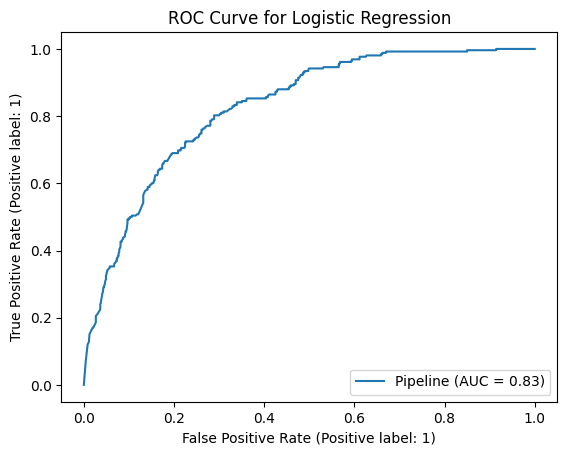

In [ ]:
#ROC Curve with ROCDisplayCurve
#RocCurveDisplay.from_estimator() -> Membuat roc berdasarkan estimator
#RocCurveDisplay.from_prediction() -> Membuat roc berdasarkan prediction
RocCurveDisplay.from_estimator(tuning_logreg,X_test,y_test)
plt.title('ROC Curve for Logistic Regression')
plt.show()

The logistic regression model achieved a ROC AUC of 0.83 on the testing data. This value falls between 0.5 and 1, indicating good discrimination between customer churn (class 1) and non-churn (class 0). In simpler terms, the model performs better than random guessing at distinguishing between these two classes.

### 4.3.2 Evaluation on SVC Model

In [ ]:
#Test performence on data testing
y_pred_test = tuning_svc.predict(X_test)
print('Classification report :')
print(classification_report(y_test,y_pred_test))

Classification report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       713
           1       0.27      1.00      0.42       258

    accuracy                           0.27       971
   macro avg       0.13      0.50      0.21       971
weighted avg       0.07      0.27      0.11       971



Our evaluation of the tuned SVC model on testing data reveals a concerning pattern. While the model achieves a perfect recall (1) for identifying churning customers (class 1), its precision for this class is very low, close to 0. Conversely, the model's performance in predicting non-churning customers (class 0) is equally poor, with both precision and recall at 0. This behavior suggests the model consistently misclassifies all data points as churning (class 1). Due to this bias, the model's performance is not suitable for real-world applications.

This is also evidenced by the roc_auc value of the svc model that has been tuned in predicting the testing data.

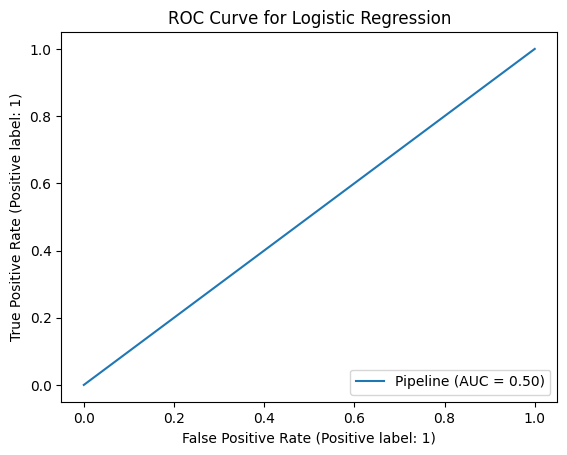

In [ ]:
#ROC Curve with ROCDisplayCurve
#RocCurveDisplay.from_estimator() -> Membuat roc berdasarkan estimator
#RocCurveDisplay.from_prediction() -> Membuat roc berdasarkan prediction
RocCurveDisplay.from_estimator(tuning_svc,X_test,y_test)
plt.title('ROC Curve for Logistic Regression')
plt.show()

The ROC AUC value for the tuned SVC model on the testing data is 0.5. This indicates that the model's performance is indistinguishable from random guessing when classifying churn and non-churn customers.

Our evaluation revealed that the tuned Logistic Regression model is the most suitable choice for predicting customer churn. Here's why it stands out:

- High Recall: This model excels at identifying churning customers (class 1) as evidenced by its high recall value.
Strong Class Differentiation: The model's ROC AUC value is impressive, indicating a strong ability to distinguish between churning and non-churning customers (classes 1 and 0).
- Generalizability: Critically, the model's performance remains consistent on both training and testing data. This suggests minimal overfitting and a likely ability to perform well in real-world scenarios.

Beyond its performance metrics, Logistic Regression offers several practical benefits:

- Interpretability: As a simpler model, it's easier to understand how the model makes predictions, which can be crucial for explaining its decisions.
- Efficiency: Logistic Regression requires less computational power for training and execution, making it more efficient to deploy and run.

# 5. Conclusion Model

The tuned Logistic Regression model strikes a good balance between strong performance and practical advantages, making it the optimal choice for this customer churn prediction task.

In [ ]:
best_model = tuning_logreg
best_model

Pipeline(steps=[('Data_Preprocesing',
                 ColumnTransformer(transformers=[('Encoding', OneHotEncoder(),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                 ('Scaling', MinMaxScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object'))])),
                ('Feature_Selection', SelectFwe()),
                ('Resampling', SMOTE(random_state=48)),
                ('Classifier',
                 LogisticRegression(C=0.01, max_iter=1000, penalty='l1',
                                    solver='liblinear', tol=0.01))])

In [ ]:
#Saving the best model for future use
filename = "Logistic Regression Churn.sav"
pickle.dump(best_model, open(filename,'wb'))

Build Model Logistic Regression Funcion

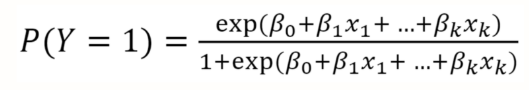

P(Y=1) : Probability Customer will churn  
β0 : Intercept (initial probability / log-odds)  
βi : Coefficient of influence from feature xi to Probability Customer will churn  
xi : Features/Independent Variable  
i = 1,2,3,...k  
k = number of feature

In [ ]:
#find all componen to create logreg model
intercept = best_model.named_steps['Classifier'].intercept_
beta = best_model.named_steps['Classifier'].coef_
feature = best_model.named_steps['Data_Preprocesing'].get_feature_names_out()

In [ ]:
intercept

array([0.])

In this logistic regression model, the **intercept is 0**. This indicates that when all the independent variables (customer characteristics) are at zero (for continuous variables) or their baseline category (for categorical variables), **the predicted probability of customer churn is 50%**.

An intercept of zero suggests a balanced scenario a log-odds of zero translates to a 50/50 chance (0.5 probability) for the outcome event when all predictors are zero.

The model may **struggle to accurately predict churn** for customers with the following profile:
- no dependents,
- no online security subscription,
- DSL internet service,
- one-year contract,
- no paperless billing,
- new to the service (tenure = 0 months).

In [ ]:
#select slope that not 0
b_coef = pd.DataFrame(beta,columns=feature)
not_zero = (b_coef!=0).any()
b_coef = b_coef.loc[:,not_zero]
b_coef

,Encoding__Dependents_Yes,Encoding__OnlineSecurity_Yes,Encoding__InternetService_Fiber optic,Encoding__InternetService_No,Encoding__Contract_Month-to-month,Encoding__Contract_Two year,Encoding__PaperlessBilling_No,Scaling__tenure
0,-0.228411,-0.12843,0.680036,-0.384313,0.80567,-0.249704,-0.281628,-1.467346


βi coefficients are the heart of interpretation in logistic regression. They represent the effect that each independent variable (variable have value 1 for categoric feature, variable have value more than 0 for numerical feature) has on the log-odds of the outcome variable.  

- Individual effect:  
Each beta coefficient (β) corresponds to a specific independent variable in the model. It tells you how much the log-odds of the outcome variable change for a one-unit increase in that particular predictor, holding all other variables constant.
- Direction of effect:
  - Positive β:  
  A positive beta coefficient indicates that a one-unit increase in the predictor is associated with an increase in the log-odds of the outcome event. In simpler terms, as the value of the predictor goes up, the likelihood of the outcome event happening also goes up.
  - Negative β:  
  Conversely, a negative beta coefficient signifies a decrease in the log-odds with a one-unit increase in the predictor. This means that higher values of the predictor are associated with a lower chance of the outcome event.  
     \

<center>  
Interpretation of βi coefficients for Logistic Regression Model

|Feature|Interpretation|
|---|---|
|Dependents|If a customer has a dependent , then the log-odds of churn decrease by 0.23.|
|Online Security|If a customer has Online Security, then the log-odds of churn decrease by 0.13.|
|Internet Service Fiber Optic|If a customer using fiber optic for internet service, then the log-odds of churn increase by 0.68.|
|No Internet Service|If a customer don't subscribe to internet service, then the log-odds of churn decrease by 0.38.|
|Contract Month to month|If a customer choose month to month contract, then the log-odds of churn increase by 0.81.|
|Contract Two Year|If a customer choose two year contract, then the log-odds of churn decrease by 0.25.|
|Paperless Billing|If a customer choose paperless bilingg, then the log-odds of churn decrease by 0.28.|
|Tenure|If a customer tenure incerease by 1 month, then the log-odds of churn decrease by 1.47.|

<center>

Logistic Regression Model to predict customer churn :

\begin{equation*}
L = e^{-0.23 Dependents -0.13 OnlineSecurity + 0.68 Internet Service Fiber Optic - 0.38 Internet service No + 0.81 Contract Month to Month - 0.25 Contract Two Year - 0.28 Paperless Billing -1.47 Tenure}
\end{equation*}

\begin{equation*}
P(Y=1) = \frac{L}{1+L}
\end{equation*}


## 5.1 Interpretation and Explanation Model

**Odds Ratio (OR)**

odds ratios (OR) are a powerful tool to understand the relationship between independent variables (predictors) and the binary outcome variable.

- **OR > 1 (Positive Effect)**  
When the odds ratio is greater than 1, it indicates a positive association between the predictor and the outcome. As the value of the predictor increases by one unit, the odds of the outcome event happening increase by a factor of OR.
- **OR = 1 (No Effect)**  
An odds ratio of exactly 1 signifies no association between the predictor and the outcome variable. A one-unit change in the predictor doesn't influence the odds of the outcome.
- **OR < 1 (Negative Effect)**  
If the odds ratio is less than 1, it represents a negative association. A one-unit increase in the predictor leads to a decrease in the odds of the outcome event by a factor of 1/OR.

In [ ]:
import math

In [ ]:
#Calculate OR for each slope
OR = b_coef.apply(math.exp)
# OR = pd.DataFrame(OR).transpose()
OR

Encoding__Dependents_Yes                 0.795797
Encoding__OnlineSecurity_Yes             0.879475
Encoding__InternetService_Fiber optic    1.973950
Encoding__InternetService_No             0.680918
Encoding__Contract_Month-to-month        2.238195
Encoding__Contract_Two year              0.779031
Encoding__PaperlessBilling_No            0.754554
Scaling__tenure                          0.230536
dtype: float64

<center>
Odds Ratio Interpretation for Logistic RegressionModel

|Feature|Interpretation|
|---|---|
|Dependents|Customers with dependents have a lower risk of churning compared to customers without dependents by a factor of approximately 0.80|
|Online Security|Customers with OnlineSecurity have a lower risk of churning compared to customers without OnlineSecurity by a factor of approximately 0.88|
|Internet Service Fiber Optic|Customers with Fiber Optic Internet Service have a higher risk of churning compared to customers with DSL Internet Service by a factor of approximately 1.97|
|No Internet Service|Customers without Internet Service have a lower risk of churning compared to customers with DSL Internet Service by a factor of approximately 0.68|
|Contract Month to month|Customers with month to month contract have a higher risk of churning compared to customers with one year contract by a factor of approximately 2.24|
|Contract Two Year|Customers with two year contract have a lower risk of churning compared to customers with one year contract by a factor of approximately 0.78|
|Paperless Billing|Customers that use paper billing have a lower risk of churning compared to customers use paperless billing by a factor of approximately 0.75|
|Tenure|Customer churn risk decreases as customer tenure increases beyond one month by a factor of approximately 0.23|

<center>

**Feature Importance**

Feature importance in logistic regression helps us understand how much each independent variable (predictor) influences the likelihood of the outcome event. It's crucial for interpreting the model and making informed decisions.

feature importance using parameter β from model Logistic Regression

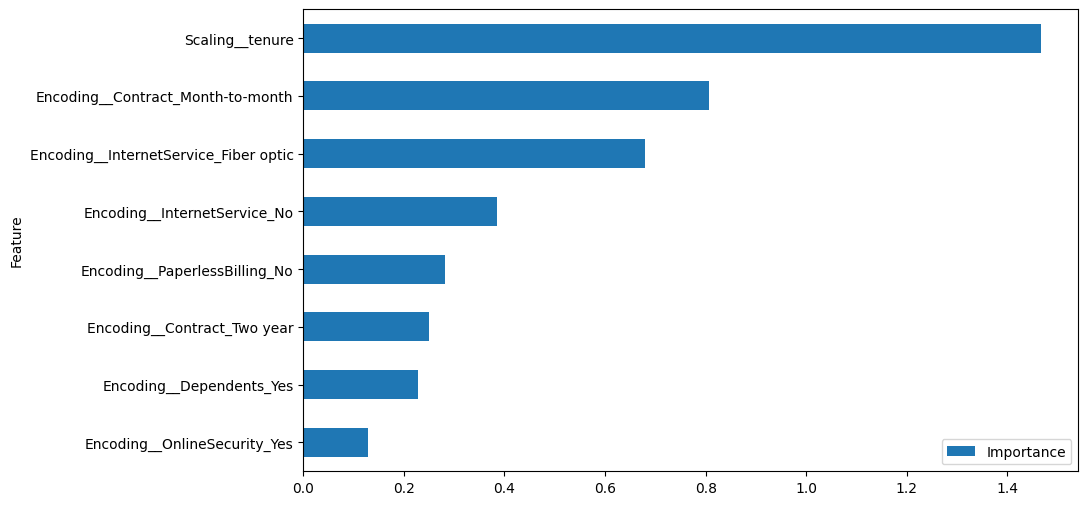

In [ ]:
#Using coefficients β for feature importance
coefficients = best_model.named_steps['Classifier'].coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)

feature_importance = pd.DataFrame({'Feature': best_model.named_steps['Data_Preprocesing'].get_feature_names_out(), 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

feature_importance.tail(8).plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.show()

The graph shows that
- factors like how long a customer has been with us (tenure), their contract terms and internet service type are the most important in predicting churn.
- Other factors, like internet service type, paperless billing usage, whether they have dependents, and their online security subscription, also play a role, but to a lesser extent.
- Therefore, let's prioritize our efforts on features with the strongest influence on churn, particularly customer tenure, month-to-month contracts, and fiber optic internet service.

feature importance using SHAP module

In [ ]:
#transform data train with encoding and scaling then feature selection
feature_transform = best_model.named_steps['Data_Preprocesing'].fit_transform(X_train)
feature_transform = best_model.named_steps['Feature_Selection'].fit_transform(feature_transform,y_train)

In [ ]:
#Create shap explainer
explainer = shap.Explainer(best_model.named_steps['Classifier'],
                           feature_transform,
                           feature_names=best_model.named_steps['Data_Preprocesing'].get_feature_names_out())
#calculate shap value
shap_values = explainer(feature_transform)

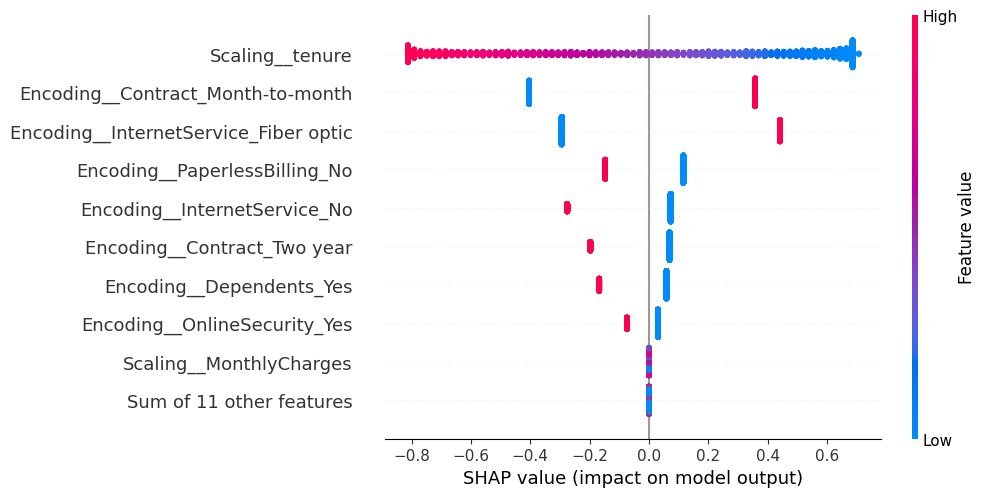

In [ ]:
shap.plots.beeswarm(shap_values)

<center>
Odds Ratio Interpretation for Logistic RegressionModel

|Feature|the higher the value|the lower the value|
|---|---|---|
|Dependents|the lower the probailiy churn|the higher the probailiy churn|
|Online Security|the lower the probailiy churn|the higher the probailiy churn|
|Internet Service Fiber Optic|the higher the probailiy churn|the lower the probailiy churn|
|No Internet Service|the lower the probailiy churn|the higher the probailiy churn|
|Contract Month to month|the higher the probailiy churn|the lower the probailiy churn|
|Contract Two Year|the lower the probailiy churn|the higher the probailiy churn|
|Paperless Billing|the lower the probailiy churn|the higher the probailiy churn|
|Tenure|the lower the probailiy churn|the higher the probailiy churn|

<center>

## 5.2 Model Implementation

To evaluate the effectiveness of machine learning in customer churn prediction, we will conduct a simulation comparing two scenarios: one utilizing a machine learning model and another using a non-machine learning approach.

- Our analysis of the business metrics reveals a customer retention cost of $113.18 per customer and customer lifetime value of \$284.8, alongside a customer churn rate of 37.25%.
- Our churn prediction model achieves a recall of 85% for customers who are likely to churn and a recall of 62% for customers who are not likely to churn
- Considering a customer base of 1,000, we can expect approximately 373 customers to churn based on the 37.25% churn rate.

- Without Machine Learning (All customer get the treatment):
Total Customer get treatment = 1000 Customer   
Total Retention Cost = 113 * 1000 = \$113.000  
Total customers who churn = 373 Customer  
Total customer retention = 627 Customer  
Wasted costs = 113 * 627 = \$70.851  
Revenue lost = 0

- With Machine Learning (only customers who are predicted to churn are given treatment)
Total Customer get treatment = (373\*85%)+(627\*(1-62%)) = (317+238)=555 Customer  
Total Retention Cost = 113 * 555 = \$62.715
Total customers who churn = 317 Customer  
Total customer retention = 238 Customer
Wasted costs = 113 * 238 = \$26.894
Revenue lost = (373-317)*285 = \$15.960

- Simulation Summary

<center>

||Total Cost|Company Losses|
|---|---|---|
|Without Machine Learning|\$113.000|\$70.851|
|With Machine Learning|\$62.715|\$42.854|


The simulation results indicate that employing a machine learning model for customer churn prediction can lead to significant cost savings for the company. Compared to not using machine learning, the company can expect:

- Lower costs associated with customer churn.
- Reduced overall losses.

By leveraging this model, the company can potentially save \$50,285, which is more than enough to cover the \$42,854 cost associated with implementing the machine learning solution.

## 5.3 Model Limitation

- Data

The model is trained on data with specific ranges for each feature (for numerical feature) or category in each feature(for categorical feautre). Introducing data points that fall outside these ranges values or category could negatively impact the model's ability to predict customer churn accurately.

In [ ]:
min_tenure = X_train['tenure'].min()
max_tenure = X_train['tenure'].max()
min_charges = X_train['MonthlyCharges'].min()
max_charges = X_train['MonthlyCharges'].max()
pd.DataFrame({'Feature':['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges'],
              'Range Value':[X_train['Dependents'].unique().tolist(),f'{min_tenure}-{max_tenure}',X_train['OnlineSecurity'].unique().tolist(),X_train['OnlineBackup'].unique().tolist(),X_train['InternetService'].unique().tolist(),X_train['DeviceProtection'].unique().tolist(),X_train['TechSupport'].unique().tolist(),X_train['Contract'].unique().tolist(),X_train['PaperlessBilling'].unique().tolist(),f'{min_charges}-{max_charges}']})

,Feature,Range Value
0,Dependents,"[No, Yes]"
1,tenure,0-72
2,OnlineSecurity,"[No, Yes]"
3,OnlineBackup,"[No, Yes]"
4,InternetService,"[No, Fiber optic, DSL]"
5,DeviceProtection,"[No, Yes]"
6,TechSupport,"[No, Yes]"
7,Contract,"[Two year, Month-to-month, One year]"
8,PaperlessBilling,"[No, Yes]"
9,MonthlyCharges,18.8-118.65


- Feature

The features used are limited to 10 existing features, namely `Dependents`, `tenure`, `OnlineSecurity`, `InternetService`, `DeviceProtection`, `TechSupport`, `Contract`, `PaperlessBilling`, and `MonthlyCharges`.

To ensure the model's continued effectiveness in predicting churn, we should be mindful of how new features might impact its performance.

- Maintance

As we collect more data, the performance of the current best model may decline. To maintain optimal performance, we should periodically retrain the model with this new data.

## 5.4 Error Analysis

An intercept of zero suggests a balanced scenario a log-odds of zero translates to a 50/50 chance (0.5 probability) for the outcome event when all predictors are zero.

The model may **struggle to accurately predict churn** for customers with the following profile:
- no dependents,
- no online security subscription,
- DSL internet service,
- one-year contract,
- no paperless billing,
- new to the service (tenure = 0 months).

#6. Conclusions and Recommendation

## 6.1 Conclusions

- Our machine learning analysis identified **the logistic regression model as the best performer for predicting customer churn**. Tenure, month-to-month contract, and internet service type were the most influential features in this model.
- Our churn prediction model can identify 85% of customers at risk of churning. By targeting these customers with special offers or interventions, we can potentially reduce the churn rate from 37.25% to 7.45%. This 29.8% decrease would bring the company closer to the ideal churn rate for mature businesses.
- The simulation results indicate that employing a machine learning model for customer churn prediction can lead to significant cost savings for the company. Compared to not using machine learning, the company can expect:

  - Lower costs associated with customer churn.
  - Reduced overall losses.

## 6.2 Recommendation

- Recommendations to optimize future machine learning model development :  
1. Adding new features like customer satisfaction scores, payment history, and website activity can improve churn prediction. This allows for a more complete picture of the customer and helps identify those at risk of leaving.

2. Add more data for customer churn (minority class)

3. Try other ML algorithms and also try hyperparameter tuning again, try using different oversampling techniques other than Random Over Sampling, such as SMOTENC, etc.

- Recommendation for Telco Company
1. Proactively engage new customers with no dependents, month-to-month contracts, and paperless billing. This segment might require more targeted outreach to understand their needs and build stronger relationships.
2. The utilization of machine learning and its results as a foundation for customer churn handling strategies:

- Shorter and clearer: Leveraging machine learning to predict churn and develop customer retention strategies.
- More impactful: Machine learning can be a powerful tool to predict customer churn and build effective retention strategies, helping businesses keep valuable customers.
- More specific: By using machine learning to analyze customer data, businesses can identify customers at risk of churn and develop targeted strategies to keep them engaged.